<a href="https://colab.research.google.com/github/AyalYakobe/Covid19OutcomesAndVaccineBehaviorByCounty/blob/main/Copy_of_STATS_4241_P1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# STATS-4241 COVID-19 Analysis

## Imports, Installs, and Drivers

### Technical

To connect to Google Drive.

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


To run R scripts and packages and various libraries. R cell can be ignored.

In [2]:
!pip install -q rpy2

In [3]:
import os
import time
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm

from sklearn.cluster import OPTICS
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE
from sklearn.cluster import DBSCAN
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.metrics import silhouette_score, silhouette_samples
import matplotlib.cm as cm

from sklearn.neighbors import NearestNeighbors
import numpy as np
import matplotlib.pyplot as plt

from sklearn.decomposition import PCA
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.impute import KNNImputer, SimpleImputer
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
from sklearn.utils import parallel_backend

import umap.umap_ as umap

import rpy2.robjects as robjects
from rpy2.robjects import pandas2ri, r

In [4]:
# # R Setup and Libraries


# ## Install if missing
# packages <- c(
#   "googledrive", "rlang", "tidyverse", "vroom", "sandwich", "lmtest",
#   "estimatr", "ggplot2", "ggthemes", "ggrepel", "scales", "plotly", "knitr"
# )

# installed <- packages %in% rownames(installed.packages())
# if (any(!installed)) {
#   install.packages(packages[!installed])
# }


# ## Mount Google Drive (in R Colab)
# library(googledrive)
# drive_auth()


# ## Utilities
# library(rlang)

# options(scipen = 999)


# ## Data
# library(tidyverse) # Data frames and more


# ## Analysis
# library(sandwich)
# library(lmtest)
# library(estimatr)


# ## Visualization
# library(ggplot2)
# library(ggthemes)
# library(ggrepel) # annotations
# library(scales)
# library(plotly)

# ### Set theme
# theme_kn <- function(grid_y = FALSE, grid_x = FALSE) {

#  grid_y_line <- if (grid_y) {
#    element_line(colour = "gray", linetype = 3)
#  } else {
#    element_blank()
#  }

#  grid_x_line <- if (grid_x) {
#    element_line(colour = "gray", linetype = 3)
#  } else {
#    element_blank()
#  }

#  theme_gray()  +
#   theme(
#    # x-axis
#    axis.title.x  = element_text(size = 10),
#    axis.text.x   = element_text(size = 8),
#    axis.ticks.x  = element_line(colour = "grey40"), ## x ticks
#    axis.line.x   = element_line(colour = "grey40"), ## x axis line
#    # y-axis
#    axis.text.y   = element_text(size = 8),
#    axis.title.y  = element_text(size = 10),
#    axis.ticks.y  = element_line(colour = "grey40"), ## y ticks
#    axis.line.y   = element_line(colour = "grey40"), ## y axis line
#    #axis.ticks.y  = element_line(),         ## No y ticks
#    # titles
#    plot.title          = element_text(size = 12, face = "bold", hjust = 0.5),
#    plot.title.position = "panel",  # NB! Align title over plot's panel
#    plot.subtitle       = element_text(hjust = 0, face= "italic"), # subtitle
#    # captions
#    plot.caption          = element_text(hjust = 0, face= "italic"),
#    plot.caption.position = "panel", # Align caption over plot's panel
#    # legend
#    legend.title = element_text(size = 10),
#    legend.key   = element_rect(fill = "transparent", colour = "transparent"),
#    legend.text  = element_text(size = 8),
#    legend.box.background = element_rect(colour = "transparent"),
#    # panel
#    panel.background   = element_rect(fill = 'transparent'),  # background colour
#    panel.grid.major.y = grid_y_line,
#    panel.grid.major.x = grid_x_line,
#    # plot text
#    text = element_text(family="Times", size = 12)  # font
#   )
# }

# theme_set(theme_kn())


# ## Formating
# library(knitr)

### Age, Sex, Race data

From Cencus bureau: https://www.census.gov/data/datasets/time-series/demo/popest/2020s-counties-detail.html

In [5]:
demo_data_df = pd.read_csv('/content/drive/My Drive/STATS-4241/county_size_and_population_data/age_sex_race.txt')
demo_data_df

,SUMLEV,STATE,COUNTY,STNAME,CTYNAME,YEAR,AGEGRP,TOT_POP,TOT_MALE,TOT_FEMALE,...,HWAC_MALE,HWAC_FEMALE,HBAC_MALE,HBAC_FEMALE,HIAC_MALE,HIAC_FEMALE,HAAC_MALE,HAAC_FEMALE,HNAC_MALE,HNAC_FEMALE
0,50,1,1,Alabama,Autauga County,1,0,58809,28698,30111,...,965,846,132,116,43,33,22,25,19,10
1,50,1,1,Alabama,Autauga County,1,1,3491,1818,1673,...,93,60,17,11,3,0,11,1,3,0
2,50,1,1,Alabama,Autauga County,1,2,3663,1875,1788,...,92,77,6,9,9,4,0,1,1,2
3,50,1,1,Alabama,Autauga County,1,3,4190,2153,2037,...,94,93,12,13,1,3,2,2,3,1
4,50,1,1,Alabama,Autauga County,1,4,3881,1962,1919,...,80,79,9,11,6,3,2,4,3,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
298675,50,56,45,Wyoming,Weston County,5,14,574,299,275,...,6,7,0,1,0,0,0,0,0,0
298676,50,56,45,Wyoming,Weston County,5,15,437,252,185,...,6,6,0,0,0,0,0,0,0,0
298677,50,56,45,Wyoming,Weston County,5,16,271,135,136,...,3,1,0,0,0,0,0,0,0,0
298678,50,56,45,Wyoming,Weston County,5,17,130,68,62,...,1,1,0,0,1,0,0,0,0,0


### Population data

Acquired county-level population data from the U.S. Census Bureau. Currently cleaning and filtering the dataset to isolate 2020 population estimates for each county.
https://www.census.gov/data/tables/time-series/demo/popest/2020s-counties-total.html?utm_source=chatgpt.com

In [6]:
population_data = "/content/drive/My Drive/STATS-4241/county_size_and_population_data/co-est2024-pop.xlsx"
population_data_df = pd.read_excel(population_data, skiprows=4)
population_data_df

,United States,331515736,331577720,332099760,334017321,336806231,340110988
0,".Autauga County, Alabama",58800.0,58909.0,59191.0,59736.0,60436.0,61464.0
1,".Baldwin County, Alabama",231767.0,233244.0,239411.0,246577.0,254107.0,261608.0
2,".Barbour County, Alabama",25226.0,24975.0,24517.0,24722.0,24644.0,24358.0
3,".Bibb County, Alabama",22284.0,22176.0,22344.0,21983.0,21890.0,22258.0
4,".Blount County, Alabama",59130.0,59110.0,59050.0,59491.0,59777.0,60163.0
...,...,...,...,...,...,...,...
3145,Note: The estimates are developed from a base ...,NaN,NaN,NaN,NaN,NaN,NaN
3146,Suggested Citation:,NaN,NaN,NaN,NaN,NaN,NaN
3147,Annual Estimates of the Resident Population fo...,NaN,NaN,NaN,NaN,NaN,NaN
3148,"Source: U.S. Census Bureau, Population Division",NaN,NaN,NaN,NaN,NaN,NaN


### Election data

Source: https://dataverse.harvard.edu/dataset.xhtml?persistentId=doi:10.7910/DVN/DGUMFI

In [7]:
pandas2ri.activate()
r['load']("/content/drive/My Drive/STATS-4241/election_data/dataverse_shareable_presidential_county_returns_1868_2020.Rdata")
pres_data_df = pandas2ri.rpy2py(r[r.objects()[0]])
pres_data_df


,election_year,fips,county_name,state,sfips,office,election_type,seat_status,democratic_raw_votes,dem_nominee,republican_raw_votes,rep_nominee,pres_raw_county_vote_totals_two_party,raw_county_vote_totals,county_first_date,county_end_date,state_admission_date,complete_county_cases,original_county_name,original_name_end_date
1,1868.0,01001,AUTAUGA,AL,01,PRES,G,Open Seat,851.0,Horatio Seymour,1505.0,Ulysses S. Grant,2356.0,2356.0,-55193.0,NaN,1819-12-14,1.0,None,NaN
2,1872.0,01001,AUTAUGA,AL,01,PRES,G,Republican President Re-election,669.0,Horace Greeley,1593.0,Ulysses S. Grant,2262.0,2262.0,-55193.0,NaN,1819-12-14,1.0,None,NaN
3,1876.0,01001,AUTAUGA,AL,01,PRES,G,Open Seat,804.0,Samuel J. Tilden,1576.0,Rutherford B. Hayes,2380.0,2380.0,-55193.0,NaN,1819-12-14,1.0,None,NaN
4,1880.0,01001,AUTAUGA,AL,01,PRES,G,Open Seat,978.0,Winfield Scott Hancock,974.0,James A. Garfield,1952.0,1967.0,-55193.0,NaN,1819-12-14,1.0,None,NaN
5,1884.0,01001,AUTAUGA,AL,01,PRES,G,Open Seat,911.0,Grover Cleveland,877.0,James G. Blaine,1788.0,1789.0,-55193.0,NaN,1819-12-14,1.0,None,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
113752,1904.0,None,JAMES,TN,48,PRES,G,Elevated Republican President Election,222.0,Alton B. Parker,533.0,Theodore Roosevelt,755.0,763.0,-36130.0,-18284.0,1845-12-29,1.0,None,NaN
113753,1908.0,None,MANCHESTER,VA,20,PRES,G,Open Seat,363.0,William Jennings Bryan,114.0,William Howard Taft,477.0,478.0,-34882.0,-21781.0,1861-01-29,1.0,None,NaN
113754,1908.0,None,JAMES,TN,20,PRES,G,Open Seat,217.0,William Jennings Bryan,608.0,William Howard Taft,825.0,826.0,-36130.0,-18284.0,1861-01-29,1.0,None,NaN
113755,1912.0,None,JAMES,TN,26,PRES,G,Republican President Re-election,202.0,Woodrow Wilson,169.0,William Howard Taft,371.0,779.0,-36130.0,-18284.0,1837-01-26,1.0,None,NaN


In [8]:
senate_election_1868_df = "/content/drive/My Drive/STATS-4241/election_data/dataverse_shareable_us_senate_county_returns_1908_2020.Rdata"
robjects.r['load'](senate_election_1868_df)
senate_data_df = pandas2ri.rpy2py(robjects.globalenv['senate_elections_release'])
senate_data_df

,election_id,election_year,fips,seat_class,county_name,state,sfips,office,election_type,seat_status,...,dem_nominee,republican_raw_votes,rep_nominee,senate_raw_county_vote_totals_two_party,raw_county_vote_totals,county_first_date,county_end_date,state_admission_date,original_county_name,original_name_end_date
1,1914 AL Class III,1914.0,01001,Class III,AUTAUGA,AL,1,SEN,G,Democratic open seat,...,Oscar W. Underwood,15.0,Alex C. Birch,540.0,602.0,-55193.0,NaN,1819-12-14,None,NaN
2,1918 AL Class II,1918.0,01001,Class II,AUTAUGA,AL,1,SEN,G,Democratic Senator re-election,...,John H. Bankhead,0.0,None,507.0,507.0,-55193.0,NaN,1819-12-14,None,NaN
3,1920 AL Class III,1920.0,01001,Class III,AUTAUGA,AL,1,SEN,G,Democratic Senator re-election,...,Oscar W. Underwood,167.0,L.H. Reynolds,1124.0,1130.0,-55193.0,NaN,1819-12-14,None,NaN
4,1920 AL Class II,1920.0,01001,Class II,AUTAUGA,AL,1,SEN,S,Democratic open seat,...,J. Thomas Heflin,143.0,C.P. Lunsford,1157.0,1164.0,-55193.0,NaN,1819-12-14,None,NaN
5,1924 AL Class II,1924.0,01001,Class II,AUTAUGA,AL,1,SEN,G,Democratic Senator re-election,...,J. Thomas Heflin,101.0,F.H. Lathrop,947.0,947.0,-55193.0,NaN,1819-12-14,None,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
118683,2008 WY Class I,2008.0,56045,Class I,WESTON,WY,56,SEN,S,Appointed Republican Senator Election,...,Nick Carter,2789.0,John Barrasso,3361.0,3363.0,-29149.0,NaN,1890-07-10,None,NaN
118684,2012 WY Class I,2012.0,56045,Class I,WESTON,WY,56,SEN,G,Republican Senator re-election,...,Tim Chesnut,2887.0,John Barrasso,3223.0,3346.0,-29149.0,NaN,1890-07-10,None,NaN
118685,2014 WY Class II,2014.0,56045,Class II,WESTON,WY,56,SEN,G,Republican Senator re-election,...,Charlie Hardy,2027.0,Mike Enzi,2221.0,2485.0,-29149.0,NaN,1890-07-10,None,NaN
118686,2018 WY Class I,2018.0,56045,Class I,WESTON,WY,56,SEN,G,Republican Senator re-election,...,Gary Trauner,2275.0,John Barrasso,2596.0,2688.0,-29149.0,NaN,1890-07-10,None,NaN


In [9]:
gov_election_data_df = "/content/drive/My Drive/STATS-4241/election_data/dataverse_shareable_gubernatorial_county_returns_1865_2020.Rdata"
robjects.r['load'](gov_election_data_df)
gov_data_df = pandas2ri.rpy2py(robjects.globalenv['gov_elections_release'])
gov_data_df


,election_id,election_year,fips,county_name,state,sfips,office,election_type,seat_status,democratic_raw_votes,dem_nominee,republican_raw_votes,rep_nominee,gov_raw_county_vote_totals_two_party,raw_county_vote_totals,county_first_date,county_end_date,state_admission_date,original_county_name,original_name_end_date
1,1865 AL,1865.0,01001,AUTAUGA,AL,1,GOV,G,Democratic Open Seat Uncontested by Republicans,391.0,"Bulger, Michael J.",0.0,None,391.0,757.0,-55193.0,NaN,1819-12-14,None,NaN
2,1868 AL,1868.0,01001,AUTAUGA,AL,1,GOV,G,Third-Party/Independent Open Seat Uncontested ...,0.0,None,1754.0,"Smith, William Hugh",1754.0,1754.0,-55193.0,NaN,1819-12-14,None,NaN
3,1870 AL,1870.0,01001,AUTAUGA,AL,1,GOV,G,Republican Open Seat,0.0,"Lindsay, Robert B.",0.0,"Smith, William Hugh",0.0,2317.0,-55193.0,NaN,1819-12-14,None,NaN
4,1872 AL,1872.0,01001,AUTAUGA,AL,1,GOV,G,Democratic Open Seat Uncontested by Democrats,0.0,None,0.0,"Lewis, David P.",0.0,2274.0,-55193.0,NaN,1819-12-14,None,NaN
5,1874 AL,1874.0,01001,AUTAUGA,AL,1,GOV,G,Republican Open Seat,778.0,"Houston, George S.",1648.0,"Lewis, David P.",2426.0,2426.0,-55193.0,NaN,1819-12-14,None,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
149320,1910 TN,1910.0,None,JAMES,TN,21,GOV,G,Democratic Open Seat,174.0,"Taylor, Robert L.",521.0,"Hooper, Ben W.",695.0,695.0,-62091.0,-18260.0,1796-06-01,None,NaN
149321,1912 TN,1912.0,None,JAMES,TN,21,GOV,G,Republican Open Seat,196.0,"McMillin, Benton",516.0,"Hooper, Ben W.",712.0,774.0,-62091.0,-18260.0,1796-06-01,None,NaN
149322,1914 TN,1914.0,None,JAMES,TN,21,GOV,G,Republican Open Seat,156.0,"Rye, Tom C.",319.0,"Hooper, Ben W.",475.0,475.0,-62091.0,-18260.0,1796-06-01,None,NaN
149323,1916 TN,1916.0,None,JAMES,TN,21,GOV,G,Democratic Open Seat,229.0,"Rye, Tom C.",606.0,"Overall, John W.",835.0,836.0,-62091.0,-18260.0,1796-06-01,None,NaN


In [10]:
pres_data_df['county_name'] = pres_data_df['county_name'].str.upper().str.strip()
senate_data_df['county_name'] = senate_data_df['county_name'].str.upper().str.strip()
gov_data_df['county_name'] = gov_data_df['county_name'].str.upper().str.strip()

print(f"Presidential Columns: {pres_data_df.columns}")
print(f"Sentate Columns: {senate_data_df.columns}")
print(f"Governor Columns: {gov_data_df.columns}")

Presidential Columns: Index(['election_year', 'fips', 'county_name', 'state', 'sfips', 'office',
       'election_type', 'seat_status', 'democratic_raw_votes', 'dem_nominee',
       'republican_raw_votes', 'rep_nominee',
       'pres_raw_county_vote_totals_two_party', 'raw_county_vote_totals',
       'county_first_date', 'county_end_date', 'state_admission_date',
       'complete_county_cases', 'original_county_name',
       'original_name_end_date'],
      dtype='object')
Sentate Columns: Index(['election_id', 'election_year', 'fips', 'seat_class', 'county_name',
       'state', 'sfips', 'office', 'election_type', 'seat_status',
       'democratic_raw_votes', 'dem_nominee', 'republican_raw_votes',
       'rep_nominee', 'senate_raw_county_vote_totals_two_party',
       'raw_county_vote_totals', 'county_first_date', 'county_end_date',
       'state_admission_date', 'original_county_name',
       'original_name_end_date'],
      dtype='object')
Governor Columns: Index(['election_id', 'el

Merge all election data.

In [11]:
merged_election_df = pres_data_df.merge(
    senate_data_df,
    on=['fips', 'election_year'],
    how='outer',
    suffixes=('_pres', '_sen')
).merge(
    gov_data_df,
    on=['fips', 'election_year'],
    how='outer',
    suffixes=('', '_gov')
)
merged_election_df

,election_year,fips,county_name_pres,state_pres,sfips_pres,office_pres,election_type_pres,seat_status_pres,democratic_raw_votes_pres,dem_nominee_pres,...,dem_nominee,republican_raw_votes,rep_nominee,gov_raw_county_vote_totals_two_party,raw_county_vote_totals,county_first_date,county_end_date,state_admission_date,original_county_name,original_name_end_date
0,1865.0,01001,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,"Bulger, Michael J.",0.0,None,391.0,757.0,-55193.0,NaN,1819-12-14,None,NaN
1,1868.0,01001,AUTAUGA,AL,01,PRES,G,Open Seat,851.0,Horatio Seymour,...,None,1754.0,"Smith, William Hugh",1754.0,1754.0,-55193.0,NaN,1819-12-14,None,NaN
2,1870.0,01001,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,"Lindsay, Robert B.",0.0,"Smith, William Hugh",0.0,2317.0,-55193.0,NaN,1819-12-14,None,NaN
3,1872.0,01001,AUTAUGA,AL,01,PRES,G,Republican President Re-election,669.0,Horace Greeley,...,None,0.0,"Lewis, David P.",0.0,2274.0,-55193.0,NaN,1819-12-14,None,NaN
4,1874.0,01001,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,"Houston, George S.",1648.0,"Lewis, David P.",2426.0,2426.0,-55193.0,NaN,1819-12-14,None,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
231190,1910.0,None,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,"Taylor, Robert L.",521.0,"Hooper, Ben W.",695.0,695.0,-62091.0,-18260.0,1796-06-01,None,NaN
231191,1912.0,None,JAMES,TN,26,PRES,G,Republican President Re-election,202.0,Woodrow Wilson,...,"McMillin, Benton",516.0,"Hooper, Ben W.",712.0,774.0,-62091.0,-18260.0,1796-06-01,None,NaN
231192,1914.0,None,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,"Rye, Tom C.",319.0,"Hooper, Ben W.",475.0,475.0,-62091.0,-18260.0,1796-06-01,None,NaN
231193,1916.0,None,JAMES,TN,26,PRES,G,Democratic President Re-election,230.0,Woodrow Wilson,...,"Rye, Tom C.",606.0,"Overall, John W.",835.0,836.0,-62091.0,-18260.0,1796-06-01,None,NaN


### Covid-19 infection data

This is CDC data: https://data.cdc.gov/dataset/Weekly-United-States-COVID-19-Cases-and-Deaths-by-/yviw-z6j5

In [12]:
infection_data_df = pd.read_csv("/content/drive/My Drive/STATS-4241/covid_data/covid_infection_data/Weekly_United_States_COVID-19_Cases_and_Deaths_by_County_-_ARCHIVED_20250618.csv")
infection_data_df

,fips_code,county,state,state_fips,date,cumulative_cases,cumulative_deaths,New cases,New deaths
0,1005,Barbour County,AL,1,01/22/2020,0,0,0,0
1,1005,Barbour County,AL,1,01/29/2020,0,0,0,0
2,1005,Barbour County,AL,1,02/05/2020,0,0,0,0
3,1005,Barbour County,AL,1,02/12/2020,0,0,0,0
4,1005,Barbour County,AL,1,02/19/2020,0,0,0,0
...,...,...,...,...,...,...,...,...,...
566051,72149,Villalba,PR,72,04/12/2023,7698,0,6,0
566052,72149,Villalba,PR,72,04/19/2023,7707,0,9,0
566053,72149,Villalba,PR,72,04/26/2023,7730,0,23,0
566054,72149,Villalba,PR,72,05/03/2023,7753,0,23,0


### Vaccine data

This is CDC data: https://data.cdc.gov/Vaccinations/COVID-19-Vaccinations-in-the-United-States-County/8xkx-amqh

In [13]:
vaccine_dist_data_df = pd.read_csv("/content/drive/My Drive/STATS-4241/covid_data/covid_vaccine_data/COVID-19_Vaccinations_in_the_United_States_County_20250618.csv")
vaccine_dist_data_df

/tmp/ipython-input-13-2851068498.py:1: DtypeWarning: Columns (1) have mixed types. Specify dtype option on import or set low_memory=False.
  vaccine_dist_data_df = pd.read_csv("/content/drive/My Drive/STATS-4241/covid_data/covid_vaccine_data/COVID-19_Vaccinations_in_the_United_States_County_20250618.csv")


,Date,FIPS,MMWR_week,Recip_County,Recip_State,Completeness_pct,Administered_Dose1_Recip,Administered_Dose1_Pop_Pct,Administered_Dose1_Recip_5Plus,Administered_Dose1_Recip_5PlusPop_Pct,...,Census2019_18PlusPop,Census2019_65PlusPop,Bivalent_Booster_5Plus,Bivalent_Booster_5Plus_Pop_Pct,Bivalent_Booster_12Plus,Bivalent_Booster_12Plus_Pop_Pct,Bivalent_Booster_18Plus,Bivalent_Booster_18Plus_Pop_Pct,Bivalent_Booster_65Plus,Bivalent_Booster_65Plus_Pop_Pct
0,05/10/2023,55129,19,Washburn County,WI,96.7,11123.0,70.8,11097.0,73.9,...,12758.0,4304.0,3978.0,26.5,3955.0,28.6,3899.0,30.6,2588.0,60.1
1,05/10/2023,19173,19,Taylor County,IA,97.3,3149.0,51.4,3145.0,55.0,...,4687.0,1392.0,841.0,14.7,841.0,16.3,834.0,17.8,588.0,42.2
2,05/10/2023,36059,19,Nassau County,NY,97.5,1391226.0,95.0,1384503.0,95.0,...,1065968.0,246690.0,236202.0,18.4,231748.0,19.8,224931.0,21.1,109947.0,44.6
3,05/10/2023,48281,19,Lampasas County,TX,98.9,11678.0,54.5,11660.0,57.4,...,16799.0,4322.0,1951.0,9.6,1947.0,10.5,1925.0,11.5,1229.0,28.4
4,05/10/2023,26145,19,Saginaw County,MI,94.0,104075.0,54.6,NaN,NaN,...,149676.0,37414.0,15618.0,8.7,15448.0,9.4,15112.0,10.1,7921.0,21.2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1962776,12/13/2020,39001,51,Adams County,OH,0.0,0.0,0.0,NaN,NaN,...,21111.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1962777,12/13/2020,18061,51,Harrison County,IN,0.0,0.0,0.0,NaN,NaN,...,31495.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1962778,12/13/2020,48321,51,Matagorda County,TX,0.0,0.0,0.0,NaN,NaN,...,27278.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1962779,12/13/2020,54073,51,Pleasants County,WV,0.0,0.0,0.0,NaN,NaN,...,6077.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [14]:
vaccine_hesistance_data_df = pd.read_csv("/content/drive/My Drive/STATS-4241/covid_data/covid_vaccine_data/Vaccine_Hesitancy_for_COVID-19__County_and_local_estimates_20250617.csv")
vaccine_hesistance_data_df

,FIPS Code,County Name,State,Estimated hesitant,Estimated hesitant or unsure,Estimated strongly hesitant,Social Vulnerability Index (SVI),SVI Category,CVAC level of concern for vaccination rollout,CVAC Level Of Concern,...,Percent Hispanic,Percent non-Hispanic American Indian/Alaska Native,Percent non-Hispanic Asian,Percent non-Hispanic Black,Percent non-Hispanic Native Hawaiian/Pacific Islander,Percent non-Hispanic White,Geographical Point,State Code,County Boundary,State Boundary
0,1123,"Tallapoosa County, Alabama",ALABAMA,0.1806,0.2400,0.1383,0.89,Very High Vulnerability,0.64,High Concern,...,0.0242,0.0022,0.0036,0.2697,0.0000,0.6887,POINT (-86.844516 32.756889),AL,"MULTIPOLYGON (((-85.841259 33.104456, -85.8409...","MULTIPOLYGON (((-88.139988 34.581703, -88.1352..."
1,1121,"Talladega County, Alabama",ALABAMA,0.1783,0.2350,0.1368,0.87,Very High Vulnerability,0.84,Very High Concern,...,0.0229,0.0043,0.0061,0.3237,0.0003,0.6263,POINT (-86.844516 32.756889),AL,"MULTIPOLYGON (((-86.303069 33.46316, -86.30306...","MULTIPOLYGON (((-88.139988 34.581703, -88.1352..."
2,1131,"Wilcox County, Alabama",ALABAMA,0.1735,0.2357,0.1337,0.93,Very High Vulnerability,0.94,Very High Concern,...,0.0053,0.0009,0.0003,0.6938,0.0000,0.2684,POINT (-86.844516 32.756889),AL,"MULTIPOLYGON (((-87.52534299999999 32.132773, ...","MULTIPOLYGON (((-88.139988 34.581703, -88.1352..."
3,1129,"Washington County, Alabama",ALABAMA,0.1735,0.2357,0.1337,0.73,High Vulnerability,0.82,Very High Concern,...,0.0146,0.0731,0.0025,0.2354,0.0000,0.6495,POINT (-86.844516 32.756889),AL,"MULTIPOLYGON (((-88.45317899999999 31.505388, ...","MULTIPOLYGON (((-88.139988 34.581703, -88.1352..."
4,1119,"Sumter County, Alabama",ALABAMA,0.1808,0.2526,0.1390,0.96,Very High Vulnerability,0.96,Very High Concern,...,0.0053,0.0007,0.0214,0.7192,0.0000,0.2481,POINT (-86.844516 32.756889),AL,"MULTIPOLYGON (((-88.369055 32.742584, -88.3685...","MULTIPOLYGON (((-88.139988 34.581703, -88.1352..."
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3137,55079,"Milwaukee County, Wisconsin",WISCONSIN,0.1505,0.2144,0.0880,0.81,Very High Vulnerability,0.30,Low Concern,...,0.1500,0.0047,0.0428,0.2606,0.0002,0.5124,POINT (-89.732969 44.639954),WI,"MULTIPOLYGON (((-87.994171 43.19255, -87.99331...","MULTIPOLYGON (((-92.887067 45.644148, -92.8825..."
3138,55121,"Trempealeau County, Wisconsin",WISCONSIN,0.1611,0.2126,0.0959,0.28,Low Vulnerability,0.31,Low Concern,...,0.0840,0.0034,0.0043,0.0051,0.0000,0.8953,POINT (-89.732969 44.639954),WI,"MULTIPOLYGON (((-91.529034 44.422101, -91.5292...","MULTIPOLYGON (((-92.887067 45.644148, -92.8825..."
3139,56001,"Albany County, Wyoming",WYOMING,0.1949,0.2673,0.1405,0.25,Low Vulnerability,0.63,High Concern,...,0.0953,0.0091,0.0327,0.0150,0.0003,0.8248,POINT (-107.55145 42.999627),WY,MULTIPOLYGON (((-106.071399 41.530719999999995...,"MULTIPOLYGON (((-111.044893 43.315719, -111.04..."
3140,55067,"Langlade County, Wisconsin",WISCONSIN,0.1518,0.2007,0.0906,0.35,Low Vulnerability,0.19,Very Low Concern,...,0.0197,0.0069,0.0022,0.0125,0.0002,0.9383,POINT (-89.732969 44.639954),WI,"MULTIPOLYGON (((-89.42472 45.293175, -89.42473...","MULTIPOLYGON (((-92.887067 45.644148, -92.8825..."


### Land area

Got it from https://github.com/balsama/us_counties_data/blob/main/data/counties.csv

In [15]:
county_size_df = pd.read_csv("/content/drive/My Drive/STATS-4241/county_size_and_population_data/densities_and_size.csv")
county_size_df

,County,State,FIPS Code,Population,Area,Density
0,Autauga County,Alabama,01001,61464,594,103
1,Baldwin County,Alabama,01003,261608,1589,165
2,Barbour County,Alabama,01005,24358,884,28
3,Bibb County,Alabama,01007,22258,622,36
4,Blount County,Alabama,01009,60163,644,93
...,...,...,...,...,...,...
3043,Sweetwater County,Wyoming,56037,41273,10426,4
3044,Teton County,Wyoming,56039,23272,4008,6
3045,Uinta County,Wyoming,56041,20621,2082,10
3046,Washakie County,Wyoming,56043,7662,2240,3


### Poverty level

This is US Census data: https://www.census.gov/library/visualizations/time-series/demo/census-poverty-tool.html?utm_source=chatgpt.com

In [16]:
poverty_df = pd.ExcelFile("/content/drive/My Drive/STATS-4241/poverty_data/Poverty-Rates-by-County-1960-2010.xlsm")
poverty_df = pd.read_excel(poverty_df, sheet_name='Data')
poverty_df


,Table with column headers in row 2,Unnamed: 1,Unnamed: 2,Unnamed: 3,Unnamed: 4,Unnamed: 5,Unnamed: 6,Unnamed: 7,Unnamed: 8,Unnamed: 9,...,Unnamed: 12,Unnamed: 13,Unnamed: 14,Unnamed: 15,Unnamed: 16,Unnamed: 17,Unnamed: 18,Unnamed: 19,Unnamed: 20,Unnamed: 21
0,Number,FIPS,State,County,Poverty Rate 1960,Poverty Rate 1970,Poverty Rate 1980,Poverty Rate 1990,Poverty Rate 2000,Poverty Rate 2010,...,Population 1980,Population 1990,Population 2000,Population 2010,Persons in Poverty 1960,Persons in Poverty 1970,Persons in Poverty 1980,Persons in Poverty 1990,Persons in Poverty 2000,Persons in Poverty 2010
1,NaN,NaN,United States,Total,22.1,13.7,12.403489,13.118086,12.377514,14.9,...,220845766,241977859,273882232,301333410,38684545,27124985,27392580,31742864,33899812,44852527
2,NaN,1,Alabama,State Total,42.5,25.4,18.9,18.3,16.1,18.1,...,3813014,3945798,4334919,4662094,1373985,857248,719905,723614,698097,842292
3,1,1001,Alabama,Autauga,53.14,23.7,16.622543,15.7,10.9,11.551009,...,32107,34009,43377,54255,9807,5758,5337,5324,4738,6267
4,2,1003,Alabama,Baldwin,41.78,22.6,16.231377,14.3,10.1,13.262972,...,77726,97227,138148,180970,20773,13304,12616,13947,14018,24002
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3194,3143,56045,Wyoming,Weston,11.69,9.7,7.420043,9.8,9.9,13.831502,...,7035,6423,6366,6825,917,604,522,628,628,944
3195,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3196,Sources: https://www.census.gov/hhes/www/pove...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3197,http://factfinder.census.gov/faces/tableservic...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


### Healthcare data

Data from CMS: https://data.cms.gov/medicare-shared-savings-program/county-level-aggregate-expenditure-and-risk-score-data-on-assignable-beneficiaries/data/2020

In [17]:
healthcare_data_1_df = pd.read_csv("/content/drive/My Drive/STATS-4241/healthcare_data/County_level_Aggregate_Expenditure_and_Risk_Score_Data_on_Assignable_Beneficiaries_2020.csv")
healthcare_data_2_df = pd.read_csv("/content/drive/My Drive/STATS-4241/healthcare_data/County_level_Aggregate_Expenditure_and_Risk_Score_Data_on_Assignable_Beneficiaries_2021.csv")
healthcare_data_3_df = pd.read_csv("/content/drive/My Drive/STATS-4241/healthcare_data/County_level_Aggregate_Expenditure_and_Risk_Score_Data_on_Assignable_Beneficiaries_2022.csv")
healthcare_data_4_df = pd.read_csv("/content/drive/My Drive/STATS-4241/healthcare_data/County_level_Aggregate_Expenditure_and_Risk_Score_Data_on_Assignable_Beneficiaries_2023_oc2.csv")

healthcare_data_1_df["YEAR"] = 2020
healthcare_data_2_df["YEAR"] = 2021
healthcare_data_3_df["YEAR"] = 2022
healthcare_data_4_df["YEAR"] = 2023

healthcare_data_df = pd.concat([
    healthcare_data_1_df,
    healthcare_data_2_df,
    healthcare_data_3_df,
    healthcare_data_4_df
], ignore_index=True)

healthcare_data_df

,YEAR,STATE_NAME,COUNTY_NAME,STATE_ID,COUNTY_ID,PER_CAPITA_EXP_ESRD,AVG_RISK_SCORE_ESRD,AVG_DEMOG_SCORE_ESRD,PERSON_YEARS_ESRD,PER_CAPITA_EXP_DIS,...,AVG_DEMOG_SCORE_DIS,PERSON_YEARS_DIS,PER_CAPITA_EXP_AGDU,AVG_RISK_SCORE_AGDU,AVG_DEMOG_SCORE_AGDU,PERSON_YEARS_AGDU,PER_CAPITA_EXP_AGND,AVG_RISK_SCORE_AGND,AVG_DEMOG_SCORE_AGND,PERSON_YEARS_AGND
0,2020,ALABAMA,AUTAUGA,1,0,81855.35,0.95958,0.95801,42.58,7900.52,...,0.91149,574.92,16646.54,0.82485,1.00433,108,8898.5,1.02651,1.01859,3150.17
1,2020,ALABAMA,BALDWIN,1,10,75425.33,1.01336,0.97671,126.08,8332.11,...,0.90932,2012.83,18301.38,0.98519,1.01047,560.75,9260.11,1.0032,1.00088,19521.33
2,2020,ALABAMA,BARBOUR,1,20,80255.12,0.9683,1.01983,56.5,9020.69,...,0.97787,412.67,16968.25,0.93576,1.04238,249.42,8539.63,0.99887,1.05448,1671.58
3,2020,ALABAMA,BIBB,1,30,79931.41,0.97521,1.03089,27,9297.74,...,0.9281,404.17,17233.89,0.97253,1.0249,174,9172.03,1.08782,1.07087,1010.67
4,2020,ALABAMA,BLOUNT,1,40,76711.24,1.01821,0.99553,26.75,8325.18,...,0.90508,601,14225.1,0.871,1.01221,227.92,10027.78,1.06557,1.04251,3142.67
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12895,2023,WYOMING,WASHAKIE,53,210,*,*,*,*,12842.59,...,1.00089,103.5,17280.61,0.85417,1.03401,65.33,13008.06,0.83926,1.02342,1099
12896,2023,WYOMING,WESTON,53,220,*,*,*,*,10285.15,...,0.9666,58.75,17847.15,0.95252,1.09921,52.92,12924.18,0.90076,1.01699,862.25
12897,2023,U.S. POSSESSIONS,MARIANA ISLANDS,63,50,61507.76,0.85614,0.94332,50.58,10490.12,...,0.88936,54.58,5948.86,0.60495,0.98611,11.08,7112.34,0.88336,0.94692,795.75
12898,2023,AMERICAN SAMOA,UNKNOWN,64,999,75244.03,0.92142,0.99144,15.17,7259.9,...,1.01988,44.92,11196.71,1.05511,0.98341,41.25,9806.07,1.02867,1.03211,214.25


## Cleaning / Filtering

### Age, sex, race data

In [18]:

demo_data_df = demo_data_df[demo_data_df["YEAR"] != 1]

year_map = {2: 2020, 3: 2021, 4: 2022, 5: 2023, 6: 2024}
demo_data_df["YEAR"] = demo_data_df["YEAR"].map(year_map)

demo_data_df['state'] = demo_data_df['STNAME'].str.upper()
demo_data_df['county'] = (
    demo_data_df['CTYNAME']
    .str.replace(r'\s+(County|Parish|Municipio|Borough)$', '', regex=True)
    .str.strip()
    .str.upper()
)

#demo_data_df = demo_data_df.drop(columns=["SUMLEV", "STATE", "COUNTY", "STNAME", "CTYNAME"])

columns_to_keep = [
    "YEAR", "county", "state",
    "AGEGRP", "TOT_POP",
    "TOT_MALE", "TOT_FEMALE",
    "WAC_MALE", "WAC_FEMALE",
    "BAC_MALE", "BAC_FEMALE",
    "AAC_MALE", "AAC_FEMALE",
    "NAC_MALE", "NAC_FEMALE",
    "H_MALE", "H_FEMALE"
]

demo_data_df = demo_data_df[columns_to_keep]

demo_data_df



/tmp/ipython-input-18-2000309727.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  demo_data_df["YEAR"] = demo_data_df["YEAR"].map(year_map)
/tmp/ipython-input-18-2000309727.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  demo_data_df['state'] = demo_data_df['STNAME'].str.upper()
/tmp/ipython-input-18-2000309727.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation:

,YEAR,county,state,AGEGRP,TOT_POP,TOT_MALE,TOT_FEMALE,WAC_MALE,WAC_FEMALE,BAC_MALE,BAC_FEMALE,AAC_MALE,AAC_FEMALE,NAC_MALE,NAC_FEMALE,H_MALE,H_FEMALE
19,2020,AUTAUGA,ALABAMA,0,58915,28760,30155,22507,23142,6046,6730,446,518,56,51,1146,991
20,2020,AUTAUGA,ALABAMA,1,3504,1832,1672,1396,1249,469,466,47,33,5,4,120,73
21,2020,AUTAUGA,ALABAMA,2,3688,1881,1807,1428,1373,483,456,38,44,0,5,100,95
22,2020,AUTAUGA,ALABAMA,3,4190,2149,2041,1609,1529,567,528,38,44,3,5,108,105
23,2020,AUTAUGA,ALABAMA,4,3862,1955,1907,1449,1447,503,460,36,40,8,8,96,88
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
298675,2023,WESTON,WYOMING,14,574,299,275,280,255,5,1,10,16,0,0,6,8
298676,2023,WESTON,WYOMING,15,437,252,185,241,177,0,0,10,8,0,0,6,6
298677,2023,WESTON,WYOMING,16,271,135,136,134,133,1,0,0,1,0,0,3,1
298678,2023,WESTON,WYOMING,17,130,68,62,67,61,0,0,0,0,0,0,2,1


Create smaller dataset with only key variables and age groups

In [19]:



# 1.  Create TOTAL_POP (copy of TOT_POP when AGEGRP == 0)
demo_data_df["TOTAL_POP"] = (
    demo_data_df["TOT_POP"]
      .where(demo_data_df["AGEGRP"] == 0)
      .groupby([demo_data_df["state"], demo_data_df["county"], demo_data_df["YEAR"]])
      .transform("first")         # propagate within county-year
)

# 2.  Map AGEGRP → age_category

def age_band(code: int) -> str:
    if code == 0:               return "Total"
    if 1  <= code <= 1:         return "Age 0–4"
    if 2  <= code <= 4:         return "Age 5–19"
    if 5  <= code <= 10:         return "Age 20–49"
    if 11  <= code <= 13:        return "Age 50–64"
    return "Age 65+"

demo_data_df["age_category"] = demo_data_df["AGEGRP"].apply(age_band)

# 3.  Define columns and split detail vs. total
sum_cols   = [
    "TOT_POP", "TOT_MALE", "TOT_FEMALE",
    "WAC_MALE", "WAC_FEMALE",
    "BAC_MALE", "BAC_FEMALE",
    "AAC_MALE", "AAC_FEMALE",
    "NAC_MALE", "NAC_FEMALE",
    "H_MALE",   "H_FEMALE"
]
group_keys = ["state", "county", "YEAR", "age_category"]

detail_df = demo_data_df.query("age_category != 'Total'").copy()
total_df  = demo_data_df.query("age_category == 'Total'").copy()

# 4.  Collapse the five bands (sum counts)
collapsed = (
    detail_df
      .groupby(group_keys, as_index=False)[sum_cols]
      .sum()
)

# bring TOTAL_POP from total_df into every collapsed row
total_pop_lookup = (
    total_df
      .groupby(["state", "county", "YEAR"], as_index=False)["TOTAL_POP"]
      .first()
)
collapsed = collapsed.merge(
    total_pop_lookup, on=["state", "county", "YEAR"], how="left"
)

# 5.  Prepare the single “Total” row per county-year
total_rows = (
    total_df
      .loc[:, group_keys + sum_cols + ["TOTAL_POP"]]
      .drop_duplicates(subset=["state", "county", "YEAR"])  # ensure 1 per county-year
)

# 6.  Combine & tidy
final_df = (
    pd.concat([collapsed, total_rows], ignore_index=True)
      .sort_values(group_keys)
      .reset_index(drop=True)
)

# 7.  Inspect
print(final_df.head())
print(
    "Rows per county-year:",
    final_df.groupby(["state", "county", "YEAR"])["age_category"].nunique().value_counts().head()
)

# Remove the “Total” age-band rows
#demo_data_df_reduced = final_df[final_df["age_category"] != "Total"].copy()


/tmp/ipython-input-19-2256403002.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  demo_data_df["TOTAL_POP"] = (
/tmp/ipython-input-19-2256403002.py:19: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  demo_data_df["age_category"] = demo_data_df["AGEGRP"].apply(age_band)


     state   county  YEAR age_category  TOT_POP  TOT_MALE  TOT_FEMALE  \
0  ALABAMA  AUTAUGA  2020      Age 0–4     3504      1832        1672   
1  ALABAMA  AUTAUGA  2020    Age 20–49    22753     11146       11607   
2  ALABAMA  AUTAUGA  2020    Age 50–64    11632      5690        5942   
3  ALABAMA  AUTAUGA  2020     Age 5–19    11740      5985        5755   
4  ALABAMA  AUTAUGA  2020      Age 65+     9286      4107        5179   

   WAC_MALE  WAC_FEMALE  BAC_MALE  BAC_FEMALE  AAC_MALE  AAC_FEMALE  NAC_MALE  \
0      1396        1249       469         466        47          33         5   
1      8544        8578      2436        2840       220         237        29   
2      4610        4665       999        1190        41          68         8   
3      4486        4349      1553        1444       112         128        11   
4      3471        4301       589         790        26          52         3   

   NAC_FEMALE  H_MALE  H_FEMALE  TOTAL_POP  
0           4     120        

Construct reduced dataset with total number and proportions by age category, gender and race for each state-county-year.

In [20]:


# 0.  Map the five bands to short column names
band_map = {
    "Age 0–4" : "Age_0_4",
    "Age 5–19": "Age_5_19",
    "Age 20–49": "Age_20_49",
    "Age 50–64": "Age_50_64",
    "Age 65+"  : "Age_65_"
}

# 1. Build the TOTAL-row–based columns
totals = (
    final_df[final_df["age_category"] == "Total"]
      .loc[:, [
          "state", "county", "YEAR",
          "TOT_MALE", "TOT_FEMALE", "TOT_POP",
          "WAC_MALE", "WAC_FEMALE",
          "BAC_MALE", "BAC_FEMALE",
          "AAC_MALE", "AAC_FEMALE",
          "NAC_MALE", "NAC_FEMALE",
          "H_MALE",   "H_FEMALE"
      ]]
      .copy()
)

# rename & derive totals
totals = totals.rename(columns={
    "TOT_MALE":  "TOT_Male",
    "TOT_FEMALE":"TOT_Female",
    "TOT_POP":   "TOT_Pop"
})

totals["TOT_White"]  = totals["WAC_MALE"] + totals["WAC_FEMALE"]
totals["TOT_Black"]  = totals["BAC_MALE"] + totals["BAC_FEMALE"]
totals["TOT_Asian"]  = totals["AAC_MALE"] + totals["AAC_FEMALE"]
totals["TOT_Native"] = totals["NAC_MALE"] + totals["NAC_FEMALE"]
totals["TOT_Hisp"]   = totals["H_MALE"]   + totals["H_FEMALE"]

# keep only the columns we need going forward
totals = totals[[
    "state", "county", "YEAR",
    "TOT_Male", "TOT_Female",
    "TOT_White", "TOT_Black", "TOT_Asian",
    "TOT_Native", "TOT_Hisp", "TOT_Pop"
]]


# 2.  Pivot the five age-band populations
bands = (
    final_df[final_df["age_category"] != "Total"]
      .loc[:, ["state", "county", "YEAR", "age_category", "TOT_POP"]]
      .copy()
)

bands["age_category"] = bands["age_category"].map(band_map)

age_pivot = (
    bands
      .pivot_table(
          index   = ["state", "county", "YEAR"],
          columns = "age_category",
          values  = "TOT_POP",
          aggfunc = "first"
      )
      .reset_index()
)

# 3. Merge totals + age bands
demo_data_df_reduced = totals.merge(
    age_pivot, on=["state", "county", "YEAR"], how="left"
)

# Re-order columns for readability
ordered_cols = [
    "state", "county", "YEAR",
    "Age_0_4", "Age_5_19", "Age_20_49", "Age_50_64", "Age_65_",
    "TOT_Male", "TOT_Female",
    "TOT_White", "TOT_Black", "TOT_Asian", "TOT_Native", "TOT_Hisp",
    "TOT_Pop"
]
demo_data_df_reduced = demo_data_df_reduced[ordered_cols]

demo_data_df_reduced




# Create percentages shares (fraction of TOT_Pop*100)

share_cols = [
     "Age_0_4", "Age_5_19", "Age_20_49", "Age_50_64", "Age_65_",
    "TOT_Male", "TOT_Female",
    "TOT_White", "TOT_Black", "TOT_Asian", "TOT_Native", "TOT_Hisp"
]

for col in share_cols:
    demo_data_df_reduced[f"{col}_share"] = (
        demo_data_df_reduced[col]
          .div(demo_data_df_reduced["TOT_Pop"].replace(0, np.nan))   # guard /0
    )

demo_data_df_reduced[[f"{c}_share" for c in share_cols]] *= 100





Check that the sums and transformation make sense

In [21]:

# 1
# exactly one row per county–year?
dupes = demo_data_df_reduced.duplicated(subset=["state", "county", "YEAR"])
print("Duplicate (state, county, YEAR) rows:", dupes.sum())

# no missing values in critical columns
print(demo_data_df_reduced.isna().sum())


# 2
# differences are expected in race (variable definition implies double counting)
race_sum = (
    demo_data_df_reduced["TOT_White"]  + demo_data_df_reduced["TOT_Black"] +
    demo_data_df_reduced["TOT_Asian"]  + demo_data_df_reduced["TOT_Native"] +
    demo_data_df_reduced["TOT_Hisp"]
)
demo_data_df_reduced["race_sum_ok"] = np.isclose(
    race_sum,
    demo_data_df_reduced["TOT_Pop"],
    rtol = 0.2,        # 10 % relative tolerance
    atol = 0.15         # absolute tolerance (e.g. off-by-1 allowed)
)
print(demo_data_df_reduced[["race_sum_ok"]].value_counts(dropna=False))

# no differences are expected in age and gender
df = demo_data_df_reduced.copy()

df["age_sum_ok"]  = (df[[    "Age_0_4", "Age_5_19", "Age_20_49", "Age_50_64", "Age_65_"]]
                     .sum(axis=1) == df["TOT_Pop"])

df["sex_sum_ok"]  = (df["TOT_Male"] + df["TOT_Female"] == df["TOT_Pop"])

# How many rows fail each check?
print(df[["age_sum_ok","sex_sum_ok"]].value_counts(dropna=False))




Duplicate (state, county, YEAR) rows: 0
state               0
county              0
YEAR                0
Age_0_4             0
Age_5_19            0
Age_20_49           0
Age_50_64           0
Age_65_             0
TOT_Male            0
TOT_Female          0
TOT_White           0
TOT_Black           0
TOT_Asian           0
TOT_Native          0
TOT_Hisp            0
TOT_Pop             0
Age_0_4_share       0
Age_5_19_share      0
Age_20_49_share     0
Age_50_64_share     0
Age_65__share       0
TOT_Male_share      0
TOT_Female_share    0
TOT_White_share     0
TOT_Black_share     0
TOT_Asian_share     0
TOT_Native_share    0
TOT_Hisp_share      0
dtype: int64
race_sum_ok
True           10646
False           1930
Name: count, dtype: int64
age_sum_ok  sex_sum_ok
True        True          12576
Name: count, dtype: int64


### Election data

Make sure we drop rows where that state didn't exist yet in the Union...

In [22]:
merged_election_df['state_admission_date_combined'] = (
    merged_election_df['state_admission_date_pres']
    .fillna(merged_election_df['state_admission_date_sen'])
    .fillna(merged_election_df['state_admission_date'])
)

merged_election_df['state_admission_date_combined'] = pd.to_datetime(
    merged_election_df['state_admission_date_combined'], errors='coerce'
)
merged_election_df['admission_year'] = merged_election_df['state_admission_date_combined'].dt.year

merged_election_df['election_year'] = pd.to_numeric(
    merged_election_df['election_year'], errors='coerce'
)

filtered_df = merged_election_df[
    (merged_election_df['admission_year'].isna()) |
    (merged_election_df['election_year'] >= merged_election_df['admission_year'])
].copy()

print("Original rows:", len(merged_election_df))
print("Filtered rows:", len(filtered_df))


Original rows: 231195
Filtered rows: 231147


Check if this works with an obvious example - Hawaii

In [23]:
hawaii_early_rows = merged_election_df[
    (merged_election_df['state_pres'].str.upper() == 'HAWAII') &
    (merged_election_df['election_year'] < 1959)
]

print(hawaii_early_rows[['election_year', 'state_pres', 'county_name_pres']])


Empty DataFrame
Columns: [election_year, state_pres, county_name_pres]
Index: []


Now we need to filter...

In [24]:
merged_election_df.columns

Index(['election_year', 'fips', 'county_name_pres', 'state_pres', 'sfips_pres',
       'office_pres', 'election_type_pres', 'seat_status_pres',
       'democratic_raw_votes_pres', 'dem_nominee_pres',
       'republican_raw_votes_pres', 'rep_nominee_pres',
       'pres_raw_county_vote_totals_two_party', 'raw_county_vote_totals_pres',
       'county_first_date_pres', 'county_end_date_pres',
       'state_admission_date_pres', 'complete_county_cases',
       'original_county_name_pres', 'original_name_end_date_pres',
       'election_id', 'seat_class', 'county_name_sen', 'state_sen',
       'sfips_sen', 'office_sen', 'election_type_sen', 'seat_status_sen',
       'democratic_raw_votes_sen', 'dem_nominee_sen',
       'republican_raw_votes_sen', 'rep_nominee_sen',
       'senate_raw_county_vote_totals_two_party', 'raw_county_vote_totals_sen',
       'county_first_date_sen', 'county_end_date_sen',
       'state_admission_date_sen', 'original_county_name_sen',
       'original_name_end_date_s

Make state names homogeonous across datasets. This will be used multiple times in coming steps.

In [25]:
us_state_abbrev_to_name = {
    'AL': 'ALABAMA', 'AK': 'ALASKA', 'AZ': 'ARIZONA', 'AR': 'ARKANSAS', 'CA': 'CALIFORNIA',
    'CO': 'COLORADO', 'CT': 'CONNECTICUT', 'DE': 'DELAWARE', 'FL': 'FLORIDA', 'GA': 'GEORGIA',
    'HI': 'HAWAII', 'ID': 'IDAHO', 'IL': 'ILLINOIS', 'IN': 'INDIANA', 'IA': 'IOWA',
    'KS': 'KANSAS', 'KY': 'KENTUCKY', 'LA': 'LOUISIANA', 'ME': 'MAINE', 'MD': 'MARYLAND',
    'MA': 'MASSACHUSETTS', 'MI': 'MICHIGAN', 'MN': 'MINNESOTA', 'MS': 'MISSISSIPPI', 'MO': 'MISSOURI',
    'MT': 'MONTANA', 'NE': 'NEBRASKA', 'NV': 'NEVADA', 'NH': 'NEW HAMPSHIRE', 'NJ': 'NEW JERSEY',
    'NM': 'NEW MEXICO', 'NY': 'NEW YORK', 'NC': 'NORTH CAROLINA', 'ND': 'NORTH DAKOTA', 'OH': 'OHIO',
    'OK': 'OKLAHOMA', 'OR': 'OREGON', 'PA': 'PENNSYLVANIA', 'RI': 'RHODE ISLAND', 'SC': 'SOUTH CAROLINA',
    'SD': 'SOUTH DAKOTA', 'TN': 'TENNESSEE', 'TX': 'TEXAS', 'UT': 'UTAH', 'VT': 'VERMONT',
    'VA': 'VIRGINIA', 'WA': 'WASHINGTON', 'WV': 'WEST VIRGINIA', 'WI': 'WISCONSIN', 'WY': 'WYOMING',
    'DC': 'DISTRICT OF COLUMBIA'
}

merged_election_df['state'] = merged_election_df['state'].map(us_state_abbrev_to_name)


Important columns for analysis:

In [26]:
cols_needed = [
    'election_year', 'fips', 'state', 'county_name',

    'democratic_raw_votes_pres', 'republican_raw_votes_pres',
    'raw_county_vote_totals_pres',

    'democratic_raw_votes_sen', 'republican_raw_votes_sen',
    'senate_raw_county_vote_totals_two_party',

    'democratic_raw_votes', 'republican_raw_votes',
    'gov_raw_county_vote_totals_two_party'
]
merged_election_filtered_df = merged_election_df[cols_needed].copy()
merged_election_filtered_df

,election_year,fips,state,county_name,democratic_raw_votes_pres,republican_raw_votes_pres,raw_county_vote_totals_pres,democratic_raw_votes_sen,republican_raw_votes_sen,senate_raw_county_vote_totals_two_party,democratic_raw_votes,republican_raw_votes,gov_raw_county_vote_totals_two_party
0,1865.0,01001,ALABAMA,AUTAUGA,NaN,NaN,NaN,NaN,NaN,NaN,391.0,0.0,391.0
1,1868.0,01001,ALABAMA,AUTAUGA,851.0,1505.0,2356.0,NaN,NaN,NaN,0.0,1754.0,1754.0
2,1870.0,01001,ALABAMA,AUTAUGA,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,0.0
3,1872.0,01001,ALABAMA,AUTAUGA,669.0,1593.0,2262.0,NaN,NaN,NaN,0.0,0.0,0.0
4,1874.0,01001,ALABAMA,AUTAUGA,NaN,NaN,NaN,NaN,NaN,NaN,778.0,1648.0,2426.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
231190,1910.0,None,TENNESSEE,JAMES,NaN,NaN,NaN,NaN,NaN,NaN,174.0,521.0,695.0
231191,1912.0,None,TENNESSEE,JAMES,202.0,169.0,779.0,NaN,NaN,NaN,196.0,516.0,712.0
231192,1914.0,None,TENNESSEE,JAMES,NaN,NaN,NaN,NaN,NaN,NaN,156.0,319.0,475.0
231193,1916.0,None,TENNESSEE,JAMES,230.0,606.0,836.0,NaN,NaN,NaN,229.0,606.0,835.0


This code cleans the dataset by removing empty or sparse numeric columns and rows, then recombines it with key identifier columns.



In [27]:

non_numeric_cols = ['election_year', 'fips', 'state', 'county_name']
non_numeric_data = merged_election_filtered_df[non_numeric_cols]

numeric_data = merged_election_filtered_df.drop(columns=non_numeric_cols)
numeric_data.columns = [str(col) for col in numeric_data.columns]
numeric_data = numeric_data.astype('float32')
numeric_data.reset_index(drop=True, inplace=True)

nan_counts = numeric_data.isna().sum()
numeric_data = numeric_data.drop(columns=nan_counts[nan_counts == len(numeric_data)].index)
numeric_data = numeric_data[numeric_data.notna().sum(axis=1) >= 3]

non_numeric_data = non_numeric_data.loc[numeric_data.index].reset_index(drop=True)
cleaned_df = pd.concat([non_numeric_data, numeric_data.reset_index(drop=True)], axis=1)
cleaned_df


/usr/local/lib/python3.11/dist-packages/pandas/core/dtypes/astype.py:133: RuntimeWarning: invalid value encountered in cast
  return arr.astype(dtype, copy=True)


,election_year,fips,state,county_name,democratic_raw_votes_pres,republican_raw_votes_pres,raw_county_vote_totals_pres,democratic_raw_votes_sen,republican_raw_votes_sen,senate_raw_county_vote_totals_two_party,democratic_raw_votes,republican_raw_votes,gov_raw_county_vote_totals_two_party
0,1865.0,01001,ALABAMA,AUTAUGA,NaN,NaN,NaN,NaN,NaN,NaN,391.0,0.0,391.0
1,1868.0,01001,ALABAMA,AUTAUGA,851.0,1505.0,2356.0,NaN,NaN,NaN,0.0,1754.0,1754.0
2,1870.0,01001,ALABAMA,AUTAUGA,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,0.0
3,1872.0,01001,ALABAMA,AUTAUGA,669.0,1593.0,2262.0,NaN,NaN,NaN,0.0,0.0,0.0
4,1874.0,01001,ALABAMA,AUTAUGA,NaN,NaN,NaN,NaN,NaN,NaN,778.0,1648.0,2426.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
228608,1910.0,None,TENNESSEE,JAMES,NaN,NaN,NaN,NaN,NaN,NaN,174.0,521.0,695.0
228609,1912.0,None,TENNESSEE,JAMES,202.0,169.0,779.0,NaN,NaN,NaN,196.0,516.0,712.0
228610,1914.0,None,TENNESSEE,JAMES,NaN,NaN,NaN,NaN,NaN,NaN,156.0,319.0,475.0
228611,1916.0,None,TENNESSEE,JAMES,230.0,606.0,836.0,NaN,NaN,NaN,229.0,606.0,835.0


### Population data

Cleaning this stuff as well...

In [28]:
population_data_df = population_data_df.drop(population_data_df.columns[1], axis=1)
population_data_df.columns = ['County_State', '2020', '2021', '2022', '2023', '2024']
population_data_df = population_data_df[population_data_df['County_State'].str.contains('County', na=False)]
population_data_df['County_State'] = population_data_df['County_State'].str.lstrip('.')
population_data_df[['county', 'state']] = population_data_df['County_State'].str.extract(r'^(.*? County),\s*(.*)$')
population_data_df['county'] = population_data_df['county'].str.upper().str.replace(' COUNTY', '', regex=False)
population_data_df['state'] = population_data_df['state'].str.upper()
population_data_df = population_data_df.melt(
    id_vars=['county', 'state'],
    value_vars=['2020', '2021', '2022', '2023', '2024'],
    var_name='year',
    value_name='population_size'
)
population_data_df

,county,state,year,population_size
0,AUTAUGA,ALABAMA,2020,58909.0
1,BALDWIN,ALABAMA,2020,233244.0
2,BARBOUR,ALABAMA,2020,24975.0
3,BIBB,ALABAMA,2020,22176.0
4,BLOUNT,ALABAMA,2020,59110.0
...,...,...,...,...
14990,SWEETWATER,WYOMING,2024,41273.0
14991,TETON,WYOMING,2024,23272.0
14992,UINTA,WYOMING,2024,20621.0
14993,WASHAKIE,WYOMING,2024,7662.0


### Covid-19 infection

Need to separate cumulative vs new cases/deaths

In [29]:
infection_data_df['state'] = infection_data_df['state'].map(us_state_abbrev_to_name)
infection_data_df['county'] = (
    infection_data_df['county']
    .str.replace(r'\s+(County|Parish|Municipio|Borough)$', '', regex=True)
    .str.strip()
    .str.upper()
)

infection_data_df = infection_data_df.dropna(subset=['state'])

# Ensure date is in datetime format
infection_data_df['date'] = pd.to_datetime(infection_data_df['date'])
infection_data_df['year'] = infection_data_df['date'].dt.year

# Sort by date descending so "first" in group will be the latest
infection_data_df = infection_data_df.sort_values(
    by=["county", "state", "year", "date"],
    ascending=[True, True, True, False]
)

# Separate cumulative and flow variables
cumulative_vars = ["cumulative_cases", "cumulative_deaths"]
flow_vars = ["New cases", "New deaths"]

# Get last cumulative values per year
latest_cumulative = (
    infection_data_df
    .drop_duplicates(subset=["county", "state", "year"], keep="first")
    [["county", "state", "year"] + cumulative_vars]
)

# Get yearly sums of new cases/deaths
yearly_flows = (
    infection_data_df
    .groupby(["county", "state", "year"], as_index=False)[flow_vars]
    .sum()
)

# Merge both
infection_data_df = pd.merge(latest_cumulative, yearly_flows, on=["county", "state", "year"], how="outer")

infection_data_df

/tmp/ipython-input-29-1726465190.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  infection_data_df['date'] = pd.to_datetime(infection_data_df['date'])
/tmp/ipython-input-29-1726465190.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  infection_data_df['year'] = infection_data_df['date'].dt.year


,county,state,year,cumulative_cases,cumulative_deaths,New cases,New deaths
0,ABBEVILLE,SOUTH CAROLINA,2020,1265,24,1265,24
1,ABBEVILLE,SOUTH CAROLINA,2021,4207,54,2942,30
2,ABBEVILLE,SOUTH CAROLINA,2022,7597,72,3390,18
3,ABBEVILLE,SOUTH CAROLINA,2023,7872,79,275,7
4,ACADIA,LOUISIANA,2020,5021,152,5021,152
...,...,...,...,...,...,...,...
12767,ZAVALA,TEXAS,2023,4395,70,83,0
12768,ZIEBACH,SOUTH DAKOTA,2020,291,8,291,8
12769,ZIEBACH,SOUTH DAKOTA,2021,487,11,196,3
12770,ZIEBACH,SOUTH DAKOTA,2022,707,11,220,0


### Covid-19 vaccine distribution data

Variables on vaccine distribution are cumulative

In [30]:
vaccine_dist_data_df['state'] = vaccine_dist_data_df['Recip_State'].map(us_state_abbrev_to_name)
vaccine_dist_data_df['county'] = (
    vaccine_dist_data_df['Recip_County']
    .str.replace(r'\s+(County|Parish|Municipio|Borough)$', '', regex=True)
    .str.strip()
    .str.upper()
)

vaccine_dist_data_df = vaccine_dist_data_df.dropna(subset=['state'])


# Make a full copy to avoid SettingWithCopyWarning
vaccine_dist_data_df = vaccine_dist_data_df.copy()

vaccine_dist_data_df["Date"] = pd.to_datetime(vaccine_dist_data_df["Date"])
vaccine_dist_data_df["year"] = vaccine_dist_data_df["Date"].dt.year

# Sort by latest date within each group
vaccine_dist_data_df = vaccine_dist_data_df.sort_values(
    by=["county", "state", "year", "Date"],
    ascending=[True, True, True, False]
)

# Keep the last date entry per county/state/year
vaccine_dist_data_df = (
    vaccine_dist_data_df
    .drop_duplicates(subset=["county", "state", "year"], keep="first")
    .reset_index(drop=True)
)

# check
vaccine_dist_data_df.groupby("year")["Date"].max()

vaccine_dist_data_df




,Date,FIPS,MMWR_week,Recip_County,Recip_State,Completeness_pct,Administered_Dose1_Recip,Administered_Dose1_Pop_Pct,Administered_Dose1_Recip_5Plus,Administered_Dose1_Recip_5PlusPop_Pct,...,Bivalent_Booster_5Plus_Pop_Pct,Bivalent_Booster_12Plus,Bivalent_Booster_12Plus_Pop_Pct,Bivalent_Booster_18Plus,Bivalent_Booster_18Plus_Pop_Pct,Bivalent_Booster_65Plus,Bivalent_Booster_65Plus_Pop_Pct,state,county,year
0,2020-12-31,45001,53,Abbeville County,SC,0.0,0.0,0.0,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,SOUTH CAROLINA,ABBEVILLE,2020
1,2021-12-31,45001,52,Abbeville County,SC,93.9,10308.0,42.0,10306.0,44.1,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,SOUTH CAROLINA,ABBEVILLE,2021
2,2022-12-28,45001,52,Abbeville County,SC,93.0,11362.0,46.3,11351.0,48.6,...,7.5,1756.0,8.2,1744.0,8.9,1165.0,21.2,SOUTH CAROLINA,ABBEVILLE,2022
3,2023-05-10,45001,19,Abbeville County,SC,92.9,11411.0,46.5,11398.0,48.8,...,9.6,2236.0,10.4,2218.0,11.3,1433.0,26.1,SOUTH CAROLINA,ABBEVILLE,2023
4,2020-12-31,22001,53,Acadia Parish,LA,0.0,0.0,0.0,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,LOUISIANA,ACADIA,2020
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12765,2023-05-10,48507,19,Zavala County,TX,98.9,7305.0,61.7,7286.0,66.3,...,8.5,915.0,9.5,892.0,10.5,467.0,27.1,TEXAS,ZAVALA,2023
12766,2020-12-31,46137,53,Ziebach County,SD,0.0,0.0,0.0,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,SOUTH DAKOTA,ZIEBACH,2020
12767,2021-12-31,46137,52,Ziebach County,SD,96.7,984.0,35.7,984.0,37.8,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,SOUTH DAKOTA,ZIEBACH,2021
12768,2022-12-28,46137,52,Ziebach County,SD,96.7,1231.0,44.7,1224.0,47.0,...,6.4,152.0,6.5,131.0,6.6,39.0,14.8,SOUTH DAKOTA,ZIEBACH,2022


### Covid-19 vaccine hesitancy data

Light cleaning here. But an important note: these scores are agnostic to year (although they should actually be sensistive to the year). I asked the Professor and he said it was ok if I was just keep as a static variable across my timespan for the purposes of this project.


In [31]:
vaccine_hesistance_data_df['county'] = (
    vaccine_hesistance_data_df['County Name']
    .str.replace(r',\s*[A-Za-z\s]+$', '', regex=True)  # remove ", Alabama"
    .str.replace(r'\s+(County|Parish|Municipio|Borough)$', '', regex=True)  # remove "County"
    .str.strip()
    .str.upper()
)

vaccine_hesistance_data_df = vaccine_hesistance_data_df.drop(columns=['County Name', 'State Code'])
vaccine_hesistance_data_df

,FIPS Code,State,Estimated hesitant,Estimated hesitant or unsure,Estimated strongly hesitant,Social Vulnerability Index (SVI),SVI Category,CVAC level of concern for vaccination rollout,CVAC Level Of Concern,Percent adults fully vaccinated against COVID-19 (as of 6/10/21),Percent Hispanic,Percent non-Hispanic American Indian/Alaska Native,Percent non-Hispanic Asian,Percent non-Hispanic Black,Percent non-Hispanic Native Hawaiian/Pacific Islander,Percent non-Hispanic White,Geographical Point,County Boundary,State Boundary,county
0,1123,ALABAMA,0.1806,0.2400,0.1383,0.89,Very High Vulnerability,0.64,High Concern,0.305,0.0242,0.0022,0.0036,0.2697,0.0000,0.6887,POINT (-86.844516 32.756889),"MULTIPOLYGON (((-85.841259 33.104456, -85.8409...","MULTIPOLYGON (((-88.139988 34.581703, -88.1352...",TALLAPOOSA
1,1121,ALABAMA,0.1783,0.2350,0.1368,0.87,Very High Vulnerability,0.84,Very High Concern,0.265,0.0229,0.0043,0.0061,0.3237,0.0003,0.6263,POINT (-86.844516 32.756889),"MULTIPOLYGON (((-86.303069 33.46316, -86.30306...","MULTIPOLYGON (((-88.139988 34.581703, -88.1352...",TALLADEGA
2,1131,ALABAMA,0.1735,0.2357,0.1337,0.93,Very High Vulnerability,0.94,Very High Concern,0.394,0.0053,0.0009,0.0003,0.6938,0.0000,0.2684,POINT (-86.844516 32.756889),"MULTIPOLYGON (((-87.52534299999999 32.132773, ...","MULTIPOLYGON (((-88.139988 34.581703, -88.1352...",WILCOX
3,1129,ALABAMA,0.1735,0.2357,0.1337,0.73,High Vulnerability,0.82,Very High Concern,0.308,0.0146,0.0731,0.0025,0.2354,0.0000,0.6495,POINT (-86.844516 32.756889),"MULTIPOLYGON (((-88.45317899999999 31.505388, ...","MULTIPOLYGON (((-88.139988 34.581703, -88.1352...",WASHINGTON
4,1119,ALABAMA,0.1808,0.2526,0.1390,0.96,Very High Vulnerability,0.96,Very High Concern,0.362,0.0053,0.0007,0.0214,0.7192,0.0000,0.2481,POINT (-86.844516 32.756889),"MULTIPOLYGON (((-88.369055 32.742584, -88.3685...","MULTIPOLYGON (((-88.139988 34.581703, -88.1352...",SUMTER
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3137,55079,WISCONSIN,0.1505,0.2144,0.0880,0.81,Very High Vulnerability,0.30,Low Concern,0.543,0.1500,0.0047,0.0428,0.2606,0.0002,0.5124,POINT (-89.732969 44.639954),"MULTIPOLYGON (((-87.994171 43.19255, -87.99331...","MULTIPOLYGON (((-92.887067 45.644148, -92.8825...",MILWAUKEE
3138,55121,WISCONSIN,0.1611,0.2126,0.0959,0.28,Low Vulnerability,0.31,Low Concern,0.612,0.0840,0.0034,0.0043,0.0051,0.0000,0.8953,POINT (-89.732969 44.639954),"MULTIPOLYGON (((-91.529034 44.422101, -91.5292...","MULTIPOLYGON (((-92.887067 45.644148, -92.8825...",TREMPEALEAU
3139,56001,WYOMING,0.1949,0.2673,0.1405,0.25,Low Vulnerability,0.63,High Concern,0.445,0.0953,0.0091,0.0327,0.0150,0.0003,0.8248,POINT (-107.55145 42.999627),MULTIPOLYGON (((-106.071399 41.530719999999995...,"MULTIPOLYGON (((-111.044893 43.315719, -111.04...",ALBANY
3140,55067,WISCONSIN,0.1518,0.2007,0.0906,0.35,Low Vulnerability,0.19,Very Low Concern,0.481,0.0197,0.0069,0.0022,0.0125,0.0002,0.9383,POINT (-89.732969 44.639954),"MULTIPOLYGON (((-89.42472 45.293175, -89.42473...","MULTIPOLYGON (((-92.887067 45.644148, -92.8825...",LANGLADE


### Land data

Light cleaning. Assuming land size doesnt change, this remains static.

In [32]:
county_size_df['county'] = (
    county_size_df['County']
    .str.replace(r'\s+(County|Parish|Municipio|Borough)$', '', regex=True)
    .str.strip()
    .str.upper()
)

county_size_df['state'] = county_size_df['State'].str.upper()
county_size_df = county_size_df.drop(columns=['County', 'State'])

county_size_df

,FIPS Code,Population,Area,Density,county,state
0,01001,61464,594,103,AUTAUGA,ALABAMA
1,01003,261608,1589,165,BALDWIN,ALABAMA
2,01005,24358,884,28,BARBOUR,ALABAMA
3,01007,22258,622,36,BIBB,ALABAMA
4,01009,60163,644,93,BLOUNT,ALABAMA
...,...,...,...,...,...,...
3043,56037,41273,10426,4,SWEETWATER,WYOMING
3044,56039,23272,4008,6,TETON,WYOMING
3045,56041,20621,2082,10,UINTA,WYOMING
3046,56043,7662,2240,3,WASHAKIE,WYOMING


### Poverty data

Heavy formatting issues that I fixed here. Also, since this is approximating for decade intervals, I impute and then interpolate essentially predicting for 2020 - 2024...

In [33]:

poverty_df = poverty_df.iloc[:-4]        # drop last 4 rows
poverty_df = poverty_df.iloc[:, 1:]      # drop first column
poverty_df = poverty_df.reset_index(drop=True)

poverty_df.columns = poverty_df.iloc[0]
poverty_df = poverty_df[1:].reset_index(drop=True)

poverty_df = poverty_df.apply(pd.to_numeric, errors='ignore')

numeric_cols = poverty_df.select_dtypes(include='number').columns

imputer = KNNImputer(n_neighbors=5)
poverty_df[numeric_cols] = imputer.fit_transform(poverty_df[numeric_cols])

poverty_df = poverty_df[poverty_df["State"] != "United States"].reset_index(drop=True)

poverty_df['county'] = (
    poverty_df['County']
    .str.replace(r'\s+(County|Parish|Municipio|Borough)$', '', regex=True)
    .str.strip()
    .str.upper()
)

poverty_df['state'] = poverty_df['State'].str.upper()
poverty_df = poverty_df.drop(columns=['County', 'State'])

poverty_rate_cols = [col for col in poverty_df.columns if isinstance(col, str) and col.startswith("Poverty Rate")]

melted_df = poverty_df.melt(
    id_vars=["county", "state"],
    value_vars=poverty_rate_cols,
    var_name="variable",
    value_name="poverty_rate"
)

melted_df["year"] = melted_df["variable"].str.extract(r"(\d{4})").astype(int)
melted_df = melted_df.drop(columns=["variable"])

pivot_df = melted_df.pivot(index=["state", "county"], columns="year", values="poverty_rate")

full_years = list(range(1960, 2025))
pivot_df = pivot_df.reindex(columns=full_years)

pivot_df = pivot_df.interpolate(axis=1, limit_direction='both')

poverty_df = pivot_df.reset_index().melt(
    id_vars=["state", "county"],
    var_name="year",
    value_name="poverty_rate"
)

poverty_df

/tmp/ipython-input-33-1865771344.py:8: FutureWarning: errors='ignore' is deprecated and will raise in a future version. Use to_numeric without passing `errors` and catch exceptions explicitly instead
  poverty_df = poverty_df.apply(pd.to_numeric, errors='ignore')


,state,county,year,poverty_rate
0,ALABAMA,AUTAUGA,1960,53.140000
1,ALABAMA,BALDWIN,1960,41.780000
2,ALABAMA,BARBOUR,1960,65.650000
3,ALABAMA,BIBB,1960,56.760000
4,ALABAMA,BLOUNT,1960,45.620000
...,...,...,...,...
207540,WYOMING,SWEETWATER,2024,9.862513
207541,WYOMING,TETON,2024,7.708971
207542,WYOMING,UINTA,2024,12.393224
207543,WYOMING,WASHAKIE,2024,11.478387


## Feature Engineering

### Election data

Need to create the poltical party affilation score. -1 is more democrate, 1 is more republican. These are the "county_scores" columns.

In [34]:
def calculate_county_score(df, year, dem_col, rep_col, total_col, office):
    df_year = df[(df['election_year'] == year) & df[total_col].notna() & (df[total_col] > 0)].copy()

    if df_year.empty:
        return pd.DataFrame(columns=['fips', 'election_year', f'final_score_{office}'])

    df_year['vote_diff'] = df_year[dem_col] - df_year[rep_col]
    df_year['vote_margin'] = df_year['vote_diff'] / df_year[total_col]
    df_year['party_numeric'] = df_year['vote_margin'].apply(lambda x: 1 if x > 0 else -1 if x < 0 else 0)
    df_year['abs_margin'] = df_year['vote_margin'].abs()
    df_year['scaled_margin'] = MinMaxScaler(feature_range=(-1, 1)).fit_transform(df_year[['abs_margin']])
    df_year[f'final_score_{office}'] = df_year['scaled_margin'] * df_year['party_numeric']

    return df_year[['fips', 'election_year', f'final_score_{office}']]

def calculate_scores_by_year_county(df):
    years = sorted(df['election_year'].unique())
    all_scores = []
    for year in years:
        pres = calculate_county_score(
            df, year,
            'democratic_raw_votes_pres', 'republican_raw_votes_pres',
            'raw_county_vote_totals_pres',
            'pres'
        )
        sen = calculate_county_score(
            df, year,
            'democratic_raw_votes_sen', 'republican_raw_votes_sen',
            'senate_raw_county_vote_totals_two_party',
            'sen'
        )
        gov = calculate_county_score(
            df, year,
            'democratic_raw_votes', 'republican_raw_votes',
            'gov_raw_county_vote_totals_two_party',
            'gov'
        )
        merged = pres.merge(sen, on=['fips', 'election_year'], how='outer') \
                     .merge(gov, on=['fips', 'election_year'], how='outer')
        merged['county_score'] = merged[
            ['final_score_pres', 'final_score_sen', 'final_score_gov']
        ].mean(axis=1, skipna=True)
        merged = merged[merged['county_score'].notna()]
        all_scores.append(merged[['fips', 'election_year', 'county_score']])
    score_df = pd.concat(all_scores).reset_index(drop=True)
    score_df = score_df.groupby(['fips', 'election_year'], as_index=False)['county_score'].mean()
    return score_df


def add_county_scores(imputed_df):
    imputed_df = imputed_df[imputed_df['fips'].notna()]
    imputed_df = imputed_df[imputed_df['state'].notna() & imputed_df['county_name'].notna()]
    score_df = calculate_scores_by_year_county(imputed_df)
    imputed_df_clean = imputed_df.drop_duplicates(subset=['fips', 'election_year'])
    merged = imputed_df_clean.merge(score_df, on=['fips', 'election_year'], how='left')
    return merged

merged_scored_df = add_county_scores(cleaned_df)
merged_scored_df

,election_year,fips,state,county_name,democratic_raw_votes_pres,republican_raw_votes_pres,raw_county_vote_totals_pres,democratic_raw_votes_sen,republican_raw_votes_sen,senate_raw_county_vote_totals_two_party,democratic_raw_votes,republican_raw_votes,gov_raw_county_vote_totals_two_party,county_score
0,1865.0,01001,ALABAMA,AUTAUGA,NaN,NaN,NaN,NaN,NaN,NaN,391.0,0.0,391.0,1.0
1,1868.0,01001,ALABAMA,AUTAUGA,851.0,1505.0,2356.0,NaN,NaN,NaN,0.0,1754.0,1754.0,-0.277394
2,1870.0,01001,ALABAMA,AUTAUGA,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,0.0,NaN
3,1872.0,01001,ALABAMA,AUTAUGA,669.0,1593.0,2262.0,NaN,NaN,NaN,0.0,0.0,0.0,0.183024
4,1874.0,01001,ALABAMA,AUTAUGA,NaN,NaN,NaN,NaN,NaN,NaN,778.0,1648.0,2426.0,0.283404
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
146804,2002.0,56045,WYOMING,WESTON,NaN,NaN,NaN,490.0,2290.0,2780.0,1058.0,1631.0,2689.0,0.091605
146805,2006.0,56045,WYOMING,WESTON,NaN,NaN,NaN,508.0,2145.0,2653.0,1635.0,1028.0,2663.0,-0.469077
146806,2010.0,56045,WYOMING,WESTON,NaN,NaN,NaN,NaN,NaN,NaN,361.0,1852.0,2213.0,-0.508958
146807,2014.0,56045,WYOMING,WESTON,NaN,NaN,NaN,194.0,2027.0,2221.0,352.0,1577.0,1929.0,-0.474397


## Combining data

### Merging all dataframes

Need to merge and clean all above dataframes.

#### Election data merge

In [35]:
merged_scored_df = merged_scored_df[
    ['election_year', 'fips', 'state', 'county_name', 'county_score']
]
merged_scored_df

,election_year,fips,state,county_name,county_score
0,1865.0,01001,ALABAMA,AUTAUGA,1.0
1,1868.0,01001,ALABAMA,AUTAUGA,-0.277394
2,1870.0,01001,ALABAMA,AUTAUGA,NaN
3,1872.0,01001,ALABAMA,AUTAUGA,0.183024
4,1874.0,01001,ALABAMA,AUTAUGA,0.283404
...,...,...,...,...,...
146804,2002.0,56045,WYOMING,WESTON,0.091605
146805,2006.0,56045,WYOMING,WESTON,-0.469077
146806,2010.0,56045,WYOMING,WESTON,-0.508958
146807,2014.0,56045,WYOMING,WESTON,-0.474397


In [36]:
merged_scored_df['fips'].nunique()

3129

#### Population data merge

In [37]:
population_data_df

,county,state,year,population_size
0,AUTAUGA,ALABAMA,2020,58909.0
1,BALDWIN,ALABAMA,2020,233244.0
2,BARBOUR,ALABAMA,2020,24975.0
3,BIBB,ALABAMA,2020,22176.0
4,BLOUNT,ALABAMA,2020,59110.0
...,...,...,...,...
14990,SWEETWATER,WYOMING,2024,41273.0
14991,TETON,WYOMING,2024,23272.0
14992,UINTA,WYOMING,2024,20621.0
14993,WASHAKIE,WYOMING,2024,7662.0


#### Age, race, sex data merge

Full dataset on demographics

In [38]:
demo_data_df

,YEAR,county,state,AGEGRP,TOT_POP,TOT_MALE,TOT_FEMALE,WAC_MALE,WAC_FEMALE,BAC_MALE,BAC_FEMALE,AAC_MALE,AAC_FEMALE,NAC_MALE,NAC_FEMALE,H_MALE,H_FEMALE,TOTAL_POP,age_category
19,2020,AUTAUGA,ALABAMA,0,58915,28760,30155,22507,23142,6046,6730,446,518,56,51,1146,991,58915.0,Total
20,2020,AUTAUGA,ALABAMA,1,3504,1832,1672,1396,1249,469,466,47,33,5,4,120,73,58915.0,Age 0–4
21,2020,AUTAUGA,ALABAMA,2,3688,1881,1807,1428,1373,483,456,38,44,0,5,100,95,58915.0,Age 5–19
22,2020,AUTAUGA,ALABAMA,3,4190,2149,2041,1609,1529,567,528,38,44,3,5,108,105,58915.0,Age 5–19
23,2020,AUTAUGA,ALABAMA,4,3862,1955,1907,1449,1447,503,460,36,40,8,8,96,88,58915.0,Age 5–19
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
298675,2023,WESTON,WYOMING,14,574,299,275,280,255,5,1,10,16,0,0,6,8,6808.0,Age 65+
298676,2023,WESTON,WYOMING,15,437,252,185,241,177,0,0,10,8,0,0,6,6,6808.0,Age 65+
298677,2023,WESTON,WYOMING,16,271,135,136,134,133,1,0,0,1,0,0,3,1,6808.0,Age 65+
298678,2023,WESTON,WYOMING,17,130,68,62,67,61,0,0,0,0,0,0,2,1,6808.0,Age 65+


In [39]:
id_vars = ['YEAR', 'state', 'county']
value_vars = demo_data_df.columns.difference(id_vars + ['AGEGRP'])
pivot_df = demo_data_df.pivot_table(index=id_vars, columns='AGEGRP', values=value_vars, aggfunc='first')
pivot_df.columns = [f"{col}_{agegrp}" for col, agegrp in pivot_df.columns]
merged_df = pivot_df.reset_index()

columns_to_drop = [col for col in merged_df.columns if col.startswith('year_')]
demo_data_df = merged_df.drop(columns=columns_to_drop)
demo_data_df

,YEAR,state,county,AAC_FEMALE_0,AAC_FEMALE_1,AAC_FEMALE_2,AAC_FEMALE_3,AAC_FEMALE_4,AAC_FEMALE_5,AAC_FEMALE_6,...,age_category_9,age_category_10,age_category_11,age_category_12,age_category_13,age_category_14,age_category_15,age_category_16,age_category_17,age_category_18
0,2020,ALABAMA,AUTAUGA,518,33,44,44,40,24,27,...,Age 20–49,Age 20–49,Age 50–64,Age 50–64,Age 50–64,Age 65+,Age 65+,Age 65+,Age 65+,Age 65+
1,2020,ALABAMA,BALDWIN,2062,142,165,169,251,143,130,...,Age 20–49,Age 20–49,Age 50–64,Age 50–64,Age 50–64,Age 65+,Age 65+,Age 65+,Age 65+,Age 65+
2,2020,ALABAMA,BARBOUR,86,5,8,5,4,4,5,...,Age 20–49,Age 20–49,Age 50–64,Age 50–64,Age 50–64,Age 65+,Age 65+,Age 65+,Age 65+,Age 65+
3,2020,ALABAMA,BIBB,52,6,3,5,4,0,5,...,Age 20–49,Age 20–49,Age 50–64,Age 50–64,Age 50–64,Age 65+,Age 65+,Age 65+,Age 65+,Age 65+
4,2020,ALABAMA,BLOUNT,186,18,19,18,15,13,12,...,Age 20–49,Age 20–49,Age 50–64,Age 50–64,Age 50–64,Age 65+,Age 65+,Age 65+,Age 65+,Age 65+
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12571,2023,WYOMING,SWEETWATER,323,46,31,16,26,36,25,...,Age 20–49,Age 20–49,Age 50–64,Age 50–64,Age 50–64,Age 65+,Age 65+,Age 65+,Age 65+,Age 65+
12572,2023,WYOMING,TETON,312,28,21,12,10,27,36,...,Age 20–49,Age 20–49,Age 50–64,Age 50–64,Age 50–64,Age 65+,Age 65+,Age 65+,Age 65+,Age 65+
12573,2023,WYOMING,UINTA,120,8,14,10,11,4,4,...,Age 20–49,Age 20–49,Age 50–64,Age 50–64,Age 50–64,Age 65+,Age 65+,Age 65+,Age 65+,Age 65+
12574,2023,WYOMING,WASHAKIE,63,3,2,7,8,2,3,...,Age 20–49,Age 20–49,Age 50–64,Age 50–64,Age 50–64,Age 65+,Age 65+,Age 65+,Age 65+,Age 65+


In [40]:
demo_data_df["year"] = demo_data_df["YEAR"].astype(int)
population_data_df["year"] = population_data_df["year"].astype(int)

merged_df_ = pd.merge(
    demo_data_df,
    population_data_df,
    how="inner",
    on=["year", "county", "state"]
)
merged_df_ = merged_df.drop(columns=["YEAR"])

merged_df_

,state,county,AAC_FEMALE_0,AAC_FEMALE_1,AAC_FEMALE_2,AAC_FEMALE_3,AAC_FEMALE_4,AAC_FEMALE_5,AAC_FEMALE_6,AAC_FEMALE_7,...,age_category_9,age_category_10,age_category_11,age_category_12,age_category_13,age_category_14,age_category_15,age_category_16,age_category_17,age_category_18
0,ALABAMA,AUTAUGA,518,33,44,44,40,24,27,40,...,Age 20–49,Age 20–49,Age 50–64,Age 50–64,Age 50–64,Age 65+,Age 65+,Age 65+,Age 65+,Age 65+
1,ALABAMA,BALDWIN,2062,142,165,169,251,143,130,126,...,Age 20–49,Age 20–49,Age 50–64,Age 50–64,Age 50–64,Age 65+,Age 65+,Age 65+,Age 65+,Age 65+
2,ALABAMA,BARBOUR,86,5,8,5,4,4,5,2,...,Age 20–49,Age 20–49,Age 50–64,Age 50–64,Age 50–64,Age 65+,Age 65+,Age 65+,Age 65+,Age 65+
3,ALABAMA,BIBB,52,6,3,5,4,0,5,3,...,Age 20–49,Age 20–49,Age 50–64,Age 50–64,Age 50–64,Age 65+,Age 65+,Age 65+,Age 65+,Age 65+
4,ALABAMA,BLOUNT,186,18,19,18,15,13,12,9,...,Age 20–49,Age 20–49,Age 50–64,Age 50–64,Age 50–64,Age 65+,Age 65+,Age 65+,Age 65+,Age 65+
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12571,WYOMING,SWEETWATER,323,46,31,16,26,36,25,16,...,Age 20–49,Age 20–49,Age 50–64,Age 50–64,Age 50–64,Age 65+,Age 65+,Age 65+,Age 65+,Age 65+
12572,WYOMING,TETON,312,28,21,12,10,27,36,35,...,Age 20–49,Age 20–49,Age 50–64,Age 50–64,Age 50–64,Age 65+,Age 65+,Age 65+,Age 65+,Age 65+
12573,WYOMING,UINTA,120,8,14,10,11,4,4,11,...,Age 20–49,Age 20–49,Age 50–64,Age 50–64,Age 50–64,Age 65+,Age 65+,Age 65+,Age 65+,Age 65+
12574,WYOMING,WASHAKIE,63,3,2,7,8,2,3,6,...,Age 20–49,Age 20–49,Age 50–64,Age 50–64,Age 50–64,Age 65+,Age 65+,Age 65+,Age 65+,Age 65+


Reduced dataset on demographics

In [41]:
demo_data_df_reduced["year"] = demo_data_df_reduced["YEAR"].astype(int)
population_data_df["year"] = population_data_df["year"].astype(int)

merged_df = pd.merge(
    demo_data_df_reduced,
    population_data_df,
    how="inner",
    on=["year", "county", "state"]
)
merged_df = merged_df.drop(columns=["YEAR"])

merged_df

,state,county,Age_0_4,Age_5_19,Age_20_49,Age_50_64,Age_65_,TOT_Male,TOT_Female,TOT_White,...,TOT_Male_share,TOT_Female_share,TOT_White_share,TOT_Black_share,TOT_Asian_share,TOT_Native_share,TOT_Hisp_share,race_sum_ok,year,population_size
0,ALABAMA,AUTAUGA,3504,11740,22753,11632,9286,28760,30155,45649,...,48.816091,51.183909,77.482814,21.685479,1.636256,0.181618,3.627260,True,2020,58909.0
1,ALABAMA,AUTAUGA,3441,11775,22772,11736,9479,28782,30421,45633,...,48.615780,51.384220,77.078864,22.150905,1.690793,0.199314,3.771768,True,2021,59191.0
2,ALABAMA,AUTAUGA,3463,11835,22769,11897,9762,29030,30696,45851,...,48.605298,51.394702,76.768911,22.475974,1.712822,0.214312,3.787295,True,2022,59736.0
3,ALABAMA,AUTAUGA,3617,11775,22841,11982,10127,29277,31065,46141,...,48.518445,51.481555,76.465812,22.664148,1.839515,0.253555,3.853038,True,2023,60436.0
4,ALABAMA,BALDWIN,12241,42749,80047,49137,49053,113911,119316,208034,...,48.841258,51.158742,89.198077,9.618526,1.551278,0.170649,5.460774,True,2020,233244.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11991,WYOMING,WASHAKIE,341,1397,2537,1543,1892,3977,3733,7447,...,51.582361,48.417639,96.588846,1.335927,1.452659,0.298314,14.059663,True,2023,7736.0
11992,WYOMING,WESTON,309,1164,2397,1487,1459,3712,3104,6504,...,54.460094,45.539906,95.422535,1.628521,1.907277,0.146714,4.680164,True,2020,6817.0
11993,WYOMING,WESTON,295,1162,2350,1464,1475,3700,3046,6429,...,54.847317,45.152683,95.300919,1.571302,2.030833,0.237178,5.128965,True,2021,6747.0
11994,WYOMING,WESTON,285,1158,2405,1460,1550,3776,3082,6548,...,55.059784,44.940216,95.479732,1.662292,1.808107,0.218723,5.468066,True,2022,6872.0


Add political alignment score of the county

In [42]:
static_scores = (
    merged_scored_df
    .groupby(['county_name', 'state'], as_index=False)['county_score']
    .mean()
    .rename(columns={'county_name': 'county'})
)

pop_elec_df = pd.merge(
    merged_df,
    static_scores,
    on=['county', 'state'],
    how='inner'
)

pop_elec_df

,state,county,Age_0_4,Age_5_19,Age_20_49,Age_50_64,Age_65_,TOT_Male,TOT_Female,TOT_White,...,TOT_Female_share,TOT_White_share,TOT_Black_share,TOT_Asian_share,TOT_Native_share,TOT_Hisp_share,race_sum_ok,year,population_size,county_score
0,ALABAMA,AUTAUGA,3504,11740,22753,11632,9286,28760,30155,45649,...,51.183909,77.482814,21.685479,1.636256,0.181618,3.627260,True,2020,58909.0,0.445087
1,ALABAMA,AUTAUGA,3441,11775,22772,11736,9479,28782,30421,45633,...,51.384220,77.078864,22.150905,1.690793,0.199314,3.771768,True,2021,59191.0,0.445087
2,ALABAMA,AUTAUGA,3463,11835,22769,11897,9762,29030,30696,45851,...,51.394702,76.768911,22.475974,1.712822,0.214312,3.787295,True,2022,59736.0,0.445087
3,ALABAMA,AUTAUGA,3617,11775,22841,11982,10127,29277,31065,46141,...,51.481555,76.465812,22.664148,1.839515,0.253555,3.853038,True,2023,60436.0,0.445087
4,ALABAMA,BALDWIN,12241,42749,80047,49137,49053,113911,119316,208034,...,51.158742,89.198077,9.618526,1.551278,0.170649,5.460774,True,2020,233244.0,0.328017
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11947,WYOMING,WASHAKIE,341,1397,2537,1543,1892,3977,3733,7447,...,48.417639,96.588846,1.335927,1.452659,0.298314,14.059663,True,2023,7736.0,0.043557
11948,WYOMING,WESTON,309,1164,2397,1487,1459,3712,3104,6504,...,45.539906,95.422535,1.628521,1.907277,0.146714,4.680164,True,2020,6817.0,0.091264
11949,WYOMING,WESTON,295,1162,2350,1464,1475,3700,3046,6429,...,45.152683,95.300919,1.571302,2.030833,0.237178,5.128965,True,2021,6747.0,0.091264
11950,WYOMING,WESTON,285,1158,2405,1460,1550,3776,3082,6548,...,44.940216,95.479732,1.662292,1.808107,0.218723,5.468066,True,2022,6872.0,0.091264


#### Infection data merge

In [43]:
pop_elec_df["year"] = pop_elec_df["year"].astype(int)
infection_data_df["year"] = infection_data_df["year"].astype(int)

merged_df = pd.merge(
    pop_elec_df,
    infection_data_df,
    on=["state", "county", "year"],
    how="inner"
)

#merged_df = merged_df.drop(columns=['fips_code', 'state_fips'])
merged_df = merged_df.drop(columns=[col for col in ['fips_code', 'state_fips'] if col in merged_df.columns])

merged_df

,state,county,Age_0_4,Age_5_19,Age_20_49,Age_50_64,Age_65_,TOT_Male,TOT_Female,TOT_White,...,TOT_Native_share,TOT_Hisp_share,race_sum_ok,year,population_size,county_score,cumulative_cases,cumulative_deaths,New cases,New deaths
0,ALABAMA,AUTAUGA,3504,11740,22753,11632,9286,28760,30155,45649,...,0.181618,3.627260,True,2020,58909.0,0.445087,4164,48,4164,48
1,ALABAMA,AUTAUGA,3441,11775,22772,11736,9479,28782,30421,45633,...,0.199314,3.771768,True,2021,59191.0,0.445087,10886,160,6722,112
2,ALABAMA,AUTAUGA,3463,11835,22769,11897,9762,29030,30696,45851,...,0.214312,3.787295,True,2022,59736.0,0.445087,18961,230,8075,70
3,ALABAMA,AUTAUGA,3617,11775,22841,11982,10127,29277,31065,46141,...,0.253555,3.853038,True,2023,60436.0,0.445087,19913,235,952,5
4,ALABAMA,BALDWIN,12241,42749,80047,49137,49053,113911,119316,208034,...,0.170649,5.460774,True,2020,233244.0,0.328017,13392,160,13392,160
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11947,WYOMING,WASHAKIE,341,1397,2537,1543,1892,3977,3733,7447,...,0.298314,14.059663,True,2023,7736.0,0.043557,2642,51,45,4
11948,WYOMING,WESTON,309,1164,2397,1487,1459,3712,3104,6504,...,0.146714,4.680164,True,2020,6817.0,0.091264,474,2,474,2
11949,WYOMING,WESTON,295,1162,2350,1464,1475,3700,3046,6429,...,0.237178,5.128965,True,2021,6747.0,0.091264,1261,14,787,12
11950,WYOMING,WESTON,285,1158,2405,1460,1550,3776,3082,6548,...,0.218723,5.468066,True,2022,6872.0,0.091264,1880,22,619,8


#### Land size data

In [44]:
county_size_df_cleaned = county_size_df.drop(columns=["Density", "FIPS Code"])
county_size_df_cleaned = county_size_df_cleaned.groupby(["state", "county"], as_index=False).agg({"Area": "first"})

merged_df = merged_df.merge(
    county_size_df_cleaned,
    on=["state", "county"],
    how="inner"
)
merged_df

,state,county,Age_0_4,Age_5_19,Age_20_49,Age_50_64,Age_65_,TOT_Male,TOT_Female,TOT_White,...,TOT_Hisp_share,race_sum_ok,year,population_size,county_score,cumulative_cases,cumulative_deaths,New cases,New deaths,Area
0,ALABAMA,AUTAUGA,3504,11740,22753,11632,9286,28760,30155,45649,...,3.627260,True,2020,58909.0,0.445087,4164,48,4164,48,594
1,ALABAMA,AUTAUGA,3441,11775,22772,11736,9479,28782,30421,45633,...,3.771768,True,2021,59191.0,0.445087,10886,160,6722,112,594
2,ALABAMA,AUTAUGA,3463,11835,22769,11897,9762,29030,30696,45851,...,3.787295,True,2022,59736.0,0.445087,18961,230,8075,70,594
3,ALABAMA,AUTAUGA,3617,11775,22841,11982,10127,29277,31065,46141,...,3.853038,True,2023,60436.0,0.445087,19913,235,952,5,594
4,ALABAMA,BALDWIN,12241,42749,80047,49137,49053,113911,119316,208034,...,5.460774,True,2020,233244.0,0.328017,13392,160,13392,160,1589
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11711,WYOMING,WASHAKIE,341,1397,2537,1543,1892,3977,3733,7447,...,14.059663,True,2023,7736.0,0.043557,2642,51,45,4,2240
11712,WYOMING,WESTON,309,1164,2397,1487,1459,3712,3104,6504,...,4.680164,True,2020,6817.0,0.091264,474,2,474,2,2398
11713,WYOMING,WESTON,295,1162,2350,1464,1475,3700,3046,6429,...,5.128965,True,2021,6747.0,0.091264,1261,14,787,12,2398
11714,WYOMING,WESTON,285,1158,2405,1460,1550,3776,3082,6548,...,5.468066,True,2022,6872.0,0.091264,1880,22,619,8,2398


#### Vaccine data merge

In [45]:
merged_df["year"] = merged_df["year"].astype(int)
vaccine_dist_data_df["year"] = vaccine_dist_data_df["year"].astype(int)

merged_df = pd.merge(
    merged_df,
    vaccine_dist_data_df,
    on=["state", "county", "year"],
    how="inner"
)

merged_df

,state,county,Age_0_4,Age_5_19,Age_20_49,Age_50_64,Age_65_,TOT_Male,TOT_Female,TOT_White,...,Census2019_18PlusPop,Census2019_65PlusPop,Bivalent_Booster_5Plus,Bivalent_Booster_5Plus_Pop_Pct,Bivalent_Booster_12Plus,Bivalent_Booster_12Plus_Pop_Pct,Bivalent_Booster_18Plus,Bivalent_Booster_18Plus_Pop_Pct,Bivalent_Booster_65Plus,Bivalent_Booster_65Plus_Pop_Pct
0,ALABAMA,AUTAUGA,3504,11740,22753,11632,9286,28760,30155,45649,...,42904.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,ALABAMA,AUTAUGA,3441,11775,22772,11736,9479,28782,30421,45633,...,42904.0,8924.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,ALABAMA,AUTAUGA,3463,11835,22769,11897,9762,29030,30696,45851,...,42904.0,8924.0,2961.0,5.6,2957.0,6.2,2885.0,6.7,1479.0,16.6
3,ALABAMA,AUTAUGA,3617,11775,22841,11982,10127,29277,31065,46141,...,42904.0,8924.0,3657.0,7.0,3640.0,7.7,3540.0,8.3,1777.0,19.9
4,ALABAMA,BALDWIN,12241,42749,80047,49137,49053,113911,119316,208034,...,175680.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11711,WYOMING,WASHAKIE,341,1397,2537,1543,1892,3977,3733,7447,...,6021.0,1730.0,583.0,7.9,580.0,8.6,576.0,9.6,382.0,22.1
11712,WYOMING,WESTON,309,1164,2397,1487,1459,3712,3104,6504,...,5512.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
11713,WYOMING,WESTON,295,1162,2350,1464,1475,3700,3046,6429,...,5512.0,1478.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
11714,WYOMING,WESTON,285,1158,2405,1460,1550,3776,3082,6548,...,5512.0,1478.0,542.0,8.2,539.0,9.0,537.0,9.7,345.0,23.3


In [46]:
vaccine_hesistance_data_df = vaccine_hesistance_data_df.drop(columns=["FIPS Code"])
vaccine_hesistance_data_df = vaccine_hesistance_data_df.rename(columns={"State": "state"})

merged_df = pd.merge(
    merged_df,
    vaccine_hesistance_data_df,
    on=["state", "county"],
    how="inner"
)
merged_df

,state,county,Age_0_4,Age_5_19,Age_20_49,Age_50_64,Age_65_,TOT_Male,TOT_Female,TOT_White,...,Percent adults fully vaccinated against COVID-19 (as of 6/10/21),Percent Hispanic,Percent non-Hispanic American Indian/Alaska Native,Percent non-Hispanic Asian,Percent non-Hispanic Black,Percent non-Hispanic Native Hawaiian/Pacific Islander,Percent non-Hispanic White,Geographical Point,County Boundary,State Boundary
0,ALABAMA,AUTAUGA,3504,11740,22753,11632,9286,28760,30155,45649,...,0.288,0.0283,0.0025,0.0103,0.1900,0.0001,0.7460,POINT (-86.844516 32.756889),MULTIPOLYGON (((-86.90309599999999 32.54062599...,"MULTIPOLYGON (((-88.139988 34.581703, -88.1352..."
1,ALABAMA,AUTAUGA,3441,11775,22772,11736,9479,28782,30421,45633,...,0.288,0.0283,0.0025,0.0103,0.1900,0.0001,0.7460,POINT (-86.844516 32.756889),MULTIPOLYGON (((-86.90309599999999 32.54062599...,"MULTIPOLYGON (((-88.139988 34.581703, -88.1352..."
2,ALABAMA,AUTAUGA,3463,11835,22769,11897,9762,29030,30696,45851,...,0.288,0.0283,0.0025,0.0103,0.1900,0.0001,0.7460,POINT (-86.844516 32.756889),MULTIPOLYGON (((-86.90309599999999 32.54062599...,"MULTIPOLYGON (((-88.139988 34.581703, -88.1352..."
3,ALABAMA,AUTAUGA,3617,11775,22841,11982,10127,29277,31065,46141,...,0.288,0.0283,0.0025,0.0103,0.1900,0.0001,0.7460,POINT (-86.844516 32.756889),MULTIPOLYGON (((-86.90309599999999 32.54062599...,"MULTIPOLYGON (((-88.139988 34.581703, -88.1352..."
4,ALABAMA,BALDWIN,12241,42749,80047,49137,49053,113911,119316,208034,...,0.336,0.0456,0.0065,0.0092,0.0917,0.0000,0.8307,POINT (-86.844516 32.756889),"MULTIPOLYGON (((-87.990684 30.55549, -87.98783...","MULTIPOLYGON (((-88.139988 34.581703, -88.1352..."
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11711,WYOMING,WASHAKIE,341,1397,2537,1543,1892,3977,3733,7447,...,0.364,0.1423,0.0052,0.0000,0.0004,0.0000,0.8190,POINT (-107.55145 42.999627),"MULTIPOLYGON (((-107.63349 43.646339999999995,...","MULTIPOLYGON (((-111.044893 43.315719, -111.04..."
11712,WYOMING,WESTON,309,1164,2397,1487,1459,3712,3104,6504,...,0.311,0.0108,0.0017,0.0077,0.0023,0.0011,0.9637,POINT (-107.55145 42.999627),"MULTIPOLYGON (((-105.079133 43.813006, -105.07...","MULTIPOLYGON (((-111.044893 43.315719, -111.04..."
11713,WYOMING,WESTON,295,1162,2350,1464,1475,3700,3046,6429,...,0.311,0.0108,0.0017,0.0077,0.0023,0.0011,0.9637,POINT (-107.55145 42.999627),"MULTIPOLYGON (((-105.079133 43.813006, -105.07...","MULTIPOLYGON (((-111.044893 43.315719, -111.04..."
11714,WYOMING,WESTON,285,1158,2405,1460,1550,3776,3082,6548,...,0.311,0.0108,0.0017,0.0077,0.0023,0.0011,0.9637,POINT (-107.55145 42.999627),"MULTIPOLYGON (((-105.079133 43.813006, -105.07...","MULTIPOLYGON (((-111.044893 43.315719, -111.04..."


#### Poverty data merge

In [47]:
merged_df["year"] = merged_df["year"].astype(int)
poverty_df["year"] = poverty_df["year"].astype(int)

merged_df = pd.merge(
    merged_df,
    poverty_df,
    on=["state", "county", "year"],
    how="inner"
)
merged_df

,state,county,Age_0_4,Age_5_19,Age_20_49,Age_50_64,Age_65_,TOT_Male,TOT_Female,TOT_White,...,Percent Hispanic,Percent non-Hispanic American Indian/Alaska Native,Percent non-Hispanic Asian,Percent non-Hispanic Black,Percent non-Hispanic Native Hawaiian/Pacific Islander,Percent non-Hispanic White,Geographical Point,County Boundary,State Boundary,poverty_rate
0,ALABAMA,AUTAUGA,3504,11740,22753,11632,9286,28760,30155,45649,...,0.0283,0.0025,0.0103,0.1900,0.0001,0.7460,POINT (-86.844516 32.756889),MULTIPOLYGON (((-86.90309599999999 32.54062599...,"MULTIPOLYGON (((-88.139988 34.581703, -88.1352...",11.551009
1,ALABAMA,AUTAUGA,3441,11775,22772,11736,9479,28782,30421,45633,...,0.0283,0.0025,0.0103,0.1900,0.0001,0.7460,POINT (-86.844516 32.756889),MULTIPOLYGON (((-86.90309599999999 32.54062599...,"MULTIPOLYGON (((-88.139988 34.581703, -88.1352...",11.551009
2,ALABAMA,AUTAUGA,3463,11835,22769,11897,9762,29030,30696,45851,...,0.0283,0.0025,0.0103,0.1900,0.0001,0.7460,POINT (-86.844516 32.756889),MULTIPOLYGON (((-86.90309599999999 32.54062599...,"MULTIPOLYGON (((-88.139988 34.581703, -88.1352...",11.551009
3,ALABAMA,AUTAUGA,3617,11775,22841,11982,10127,29277,31065,46141,...,0.0283,0.0025,0.0103,0.1900,0.0001,0.7460,POINT (-86.844516 32.756889),MULTIPOLYGON (((-86.90309599999999 32.54062599...,"MULTIPOLYGON (((-88.139988 34.581703, -88.1352...",11.551009
4,ALABAMA,BALDWIN,12241,42749,80047,49137,49053,113911,119316,208034,...,0.0456,0.0065,0.0092,0.0917,0.0000,0.8307,POINT (-86.844516 32.756889),"MULTIPOLYGON (((-87.990684 30.55549, -87.98783...","MULTIPOLYGON (((-88.139988 34.581703, -88.1352...",13.262972
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11707,WYOMING,WASHAKIE,341,1397,2537,1543,1892,3977,3733,7447,...,0.1423,0.0052,0.0000,0.0004,0.0000,0.8190,POINT (-107.55145 42.999627),"MULTIPOLYGON (((-107.63349 43.646339999999995,...","MULTIPOLYGON (((-111.044893 43.315719, -111.04...",11.478387
11708,WYOMING,WESTON,309,1164,2397,1487,1459,3712,3104,6504,...,0.0108,0.0017,0.0077,0.0023,0.0011,0.9637,POINT (-107.55145 42.999627),"MULTIPOLYGON (((-105.079133 43.813006, -105.07...","MULTIPOLYGON (((-111.044893 43.315719, -111.04...",13.831502
11709,WYOMING,WESTON,295,1162,2350,1464,1475,3700,3046,6429,...,0.0108,0.0017,0.0077,0.0023,0.0011,0.9637,POINT (-107.55145 42.999627),"MULTIPOLYGON (((-105.079133 43.813006, -105.07...","MULTIPOLYGON (((-111.044893 43.315719, -111.04...",13.831502
11710,WYOMING,WESTON,285,1158,2405,1460,1550,3776,3082,6548,...,0.0108,0.0017,0.0077,0.0023,0.0011,0.9637,POINT (-107.55145 42.999627),"MULTIPOLYGON (((-105.079133 43.813006, -105.07...","MULTIPOLYGON (((-111.044893 43.315719, -111.04...",13.831502


#### Healthcare data merge

In [48]:
healthcare_data_df = healthcare_data_df.rename(columns={
    "STATE_NAME": "state",
    "COUNTY_NAME": "county",
    "YEAR": "year"
})

merged_df["year"] = merged_df["year"].astype(int)
healthcare_data_df["year"] = healthcare_data_df["year"].astype(int)

merged_df = pd.merge(
    merged_df,
    healthcare_data_df,
    on=["state", "county", "year"],
    how="inner"
)

merged_df

,state,county,Age_0_4,Age_5_19,Age_20_49,Age_50_64,Age_65_,TOT_Male,TOT_Female,TOT_White,...,AVG_DEMOG_SCORE_DIS,PERSON_YEARS_DIS,PER_CAPITA_EXP_AGDU,AVG_RISK_SCORE_AGDU,AVG_DEMOG_SCORE_AGDU,PERSON_YEARS_AGDU,PER_CAPITA_EXP_AGND,AVG_RISK_SCORE_AGND,AVG_DEMOG_SCORE_AGND,PERSON_YEARS_AGND
0,ALABAMA,AUTAUGA,3504,11740,22753,11632,9286,28760,30155,45649,...,0.91149,574.92,16646.54,0.82485,1.00433,108,8898.5,1.02651,1.01859,3150.17
1,ALABAMA,AUTAUGA,3441,11775,22772,11736,9479,28782,30421,45633,...,0.90627,523.67,20246.03,0.91798,0.99234,108.83,9838.92,1.02369,1.0249,3000.33
2,ALABAMA,AUTAUGA,3463,11835,22769,11897,9762,29030,30696,45851,...,0.89273,465.5,15689.96,1.00754,1.00985,97.08,10310.53,1.03108,1.03871,2932.17
3,ALABAMA,AUTAUGA,3617,11775,22841,11982,10127,29277,31065,46141,...,0.90768,383.83,18092.57,0.9627,1.02747,79.42,11602.33,1.07466,1.06244,2721.42
4,ALABAMA,BALDWIN,12241,42749,80047,49137,49053,113911,119316,208034,...,0.90932,2012.83,18301.38,0.98519,1.01047,560.75,9260.11,1.0032,1.00088,19521.33
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11699,WYOMING,WASHAKIE,341,1397,2537,1543,1892,3977,3733,7447,...,1.00089,103.5,17280.61,0.85417,1.03401,65.33,13008.06,0.83926,1.02342,1099
11700,WYOMING,WESTON,309,1164,2397,1487,1459,3712,3104,6504,...,0.97067,110,12131.59,0.88379,1.07958,70.17,10955.72,0.86251,0.99737,907.92
11701,WYOMING,WESTON,295,1162,2350,1464,1475,3700,3046,6429,...,0.95513,97.42,21906.63,0.87057,1.07885,62.67,11632.72,0.88311,0.98311,924.83
11702,WYOMING,WESTON,285,1158,2405,1460,1550,3776,3082,6548,...,0.95297,77.67,9878.05,0.97718,1.09264,61.17,11510.7,0.87757,0.98836,950.67


In [49]:
merged_df.columns = (
    merged_df.columns
    .str.strip()
    .str.lower()
    .str.replace(" ", "_")
    .str.replace("(", "", regex=False)
    .str.replace(")", "", regex=False)
)

merged_df = merged_df.loc[:, ~merged_df.columns.duplicated()]

merged_df = merged_df.drop_duplicates()
merged_df

,state,county,age_0_4,age_5_19,age_20_49,age_50_64,age_65_,tot_male,tot_female,tot_white,...,avg_demog_score_dis,person_years_dis,per_capita_exp_agdu,avg_risk_score_agdu,avg_demog_score_agdu,person_years_agdu,per_capita_exp_agnd,avg_risk_score_agnd,avg_demog_score_agnd,person_years_agnd
0,ALABAMA,AUTAUGA,3504,11740,22753,11632,9286,28760,30155,45649,...,0.91149,574.92,16646.54,0.82485,1.00433,108,8898.5,1.02651,1.01859,3150.17
1,ALABAMA,AUTAUGA,3441,11775,22772,11736,9479,28782,30421,45633,...,0.90627,523.67,20246.03,0.91798,0.99234,108.83,9838.92,1.02369,1.0249,3000.33
2,ALABAMA,AUTAUGA,3463,11835,22769,11897,9762,29030,30696,45851,...,0.89273,465.5,15689.96,1.00754,1.00985,97.08,10310.53,1.03108,1.03871,2932.17
3,ALABAMA,AUTAUGA,3617,11775,22841,11982,10127,29277,31065,46141,...,0.90768,383.83,18092.57,0.9627,1.02747,79.42,11602.33,1.07466,1.06244,2721.42
4,ALABAMA,BALDWIN,12241,42749,80047,49137,49053,113911,119316,208034,...,0.90932,2012.83,18301.38,0.98519,1.01047,560.75,9260.11,1.0032,1.00088,19521.33
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11699,WYOMING,WASHAKIE,341,1397,2537,1543,1892,3977,3733,7447,...,1.00089,103.5,17280.61,0.85417,1.03401,65.33,13008.06,0.83926,1.02342,1099
11700,WYOMING,WESTON,309,1164,2397,1487,1459,3712,3104,6504,...,0.97067,110,12131.59,0.88379,1.07958,70.17,10955.72,0.86251,0.99737,907.92
11701,WYOMING,WESTON,295,1162,2350,1464,1475,3700,3046,6429,...,0.95513,97.42,21906.63,0.87057,1.07885,62.67,11632.72,0.88311,0.98311,924.83
11702,WYOMING,WESTON,285,1158,2405,1460,1550,3776,3082,6548,...,0.95297,77.67,9878.05,0.97718,1.09264,61.17,11510.7,0.87757,0.98836,950.67


In [50]:
for col in merged_df.columns:
    print(col)

state
county
age_0_4
age_5_19
age_20_49
age_50_64
age_65_
tot_male
tot_female
tot_white
tot_black
tot_asian
tot_native
tot_hisp
tot_pop
age_0_4_share
age_5_19_share
age_20_49_share
age_50_64_share
age_65__share
tot_male_share
tot_female_share
tot_white_share
tot_black_share
tot_asian_share
tot_native_share
tot_hisp_share
race_sum_ok
year
population_size
county_score
cumulative_cases
cumulative_deaths
new_cases
new_deaths
area
date
fips
mmwr_week
recip_county
recip_state
completeness_pct
administered_dose1_recip
administered_dose1_pop_pct
administered_dose1_recip_5plus
administered_dose1_recip_5pluspop_pct
administered_dose1_recip_12plus
administered_dose1_recip_12pluspop_pct
administered_dose1_recip_18plus
administered_dose1_recip_18pluspop_pct
administered_dose1_recip_65plus
administered_dose1_recip_65pluspop_pct
series_complete_yes
series_complete_pop_pct
series_complete_5plus
series_complete_5pluspop_pct
series_complete_5to17
series_complete_5to17pop_pct
series_complete_12plus
serie

In [51]:
merged_df = merged_df.drop(columns=['geographical_point', 'county_boundary', 'state_boundary'])

# check range and adjust
mod_vars = [
    "estimated_hesitant",
    "cvac_level_of_concern_for_vaccination_rollout",
    "series_complete_pop_pct",
     "series_complete_65pluspop_pct",
    "cumulative_deaths"
]

for col in mod_vars:
    if col in merged_df.columns:
        col_min = merged_df[col].min(skipna=True)
        col_max = merged_df[col].max(skipna=True)
        print(f"{col:<45} Min: {col_min:<10.3f} Max: {col_max:<10.3f}")
    else:
        print(f"{col} not found in DataFrame.")

merged_df[["estimated_hesitant", "cvac_level_of_concern_for_vaccination_rollout"]] *= 100
merged_df["cumulative_deaths_per_100k"] = (merged_df["cumulative_deaths"] / merged_df["tot_pop"]) * 100_000
merged_df["cumulative_cases_per_100k"] = (merged_df["cumulative_cases"] / merged_df["tot_pop"]) * 100_000
merged_df["new_cases_per_100k"]        = (merged_df["new_cases"] / merged_df["tot_pop"]) * 100_000
merged_df["new_deaths_per_100k"]       = (merged_df["new_deaths"] / merged_df["tot_pop"]) * 100_000

merged_df["pop_density"] = merged_df["tot_pop"] / merged_df["area"].replace({0: np.nan})


merged_df["mortality_per_100k"] = (
    merged_df["cumulative_deaths"] / merged_df["tot_pop"]
) * 100000

merged_df["mortality_rate_cfr"] = (
    merged_df["cumulative_deaths"] / merged_df["cumulative_cases"]
) * 100


# check adjustment
mod_vars = [
    "estimated_hesitant",
    "cvac_level_of_concern_for_vaccination_rollout",
    "series_complete_pop_pct",
     "series_complete_65pluspop_pct",
    "cumulative_deaths_per_100k",
    "mortality_per_100k",
    "mortality_rate_cfr"
]

for col in mod_vars:
    if col in merged_df.columns:
        col_min = merged_df[col].min(skipna=True)
        col_max = merged_df[col].max(skipna=True)
        print(f"{col:<45} Min: {col_min:<10.3f} Max: {col_max:<10.3f}")
    else:
        print(f"{col} not found in DataFrame.")


for col in merged_df.columns:
    print(col)


estimated_hesitant                            Min: 0.036      Max: 0.267     
cvac_level_of_concern_for_vaccination_rollout Min: 0.000      Max: 1.000     
series_complete_pop_pct                       Min: 0.000      Max: 95.000    
series_complete_65pluspop_pct                 Min: 0.000      Max: 95.000    
cumulative_deaths                             Min: 0.000      Max: 36049.000 
estimated_hesitant                            Min: 3.590      Max: 26.700    
cvac_level_of_concern_for_vaccination_rollout Min: 0.000      Max: 100.000   
series_complete_pop_pct                       Min: 0.000      Max: 95.000    
series_complete_65pluspop_pct                 Min: 0.000      Max: 95.000    
cumulative_deaths_per_100k                    Min: 0.000      Max: 2325.581  
mortality_per_100k                            Min: 0.000      Max: 2325.581  
mortality_rate_cfr                            Min: 0.000      Max: 15.789    
state
county
age_0_4
age_5_19
age_20_49
age_50_64
age_65_
tot_ma

In [52]:
merged_df.to_csv('/content/drive/MyDrive/STATS-4241/merged_df_reduced.csv', index=False)

In [53]:
#merged_df

merged_df = pd.read_csv('/content/drive/MyDrive/STATS-4241/merged_df_reduced.csv')


/tmp/ipython-input-53-1646975826.py:3: DtypeWarning: Columns (145,146,147,148) have mixed types. Specify dtype option on import or set low_memory=False.
  merged_df = pd.read_csv('/content/drive/MyDrive/STATS-4241/merged_df_reduced.csv')


In [54]:
non_numeric_columns = merged_df.select_dtypes(exclude=[np.number])
print(non_numeric_columns.columns.tolist())

['state', 'county', 'race_sum_ok', 'date', 'recip_county', 'recip_state', 'svi_ctgy', 'metro_status', 'svi_category', 'cvac_level_of_concern', 'per_capita_exp_esrd', 'avg_risk_score_esrd', 'avg_demog_score_esrd', 'person_years_esrd', 'per_capita_exp_dis', 'avg_risk_score_dis', 'avg_demog_score_dis', 'person_years_dis', 'per_capita_exp_agdu', 'avg_risk_score_agdu', 'avg_demog_score_agdu', 'person_years_agdu', 'per_capita_exp_agnd', 'avg_risk_score_agnd', 'avg_demog_score_agnd', 'person_years_agnd']


## Exploratory data

As we can see here, we have ~93% of state county coverage in the US across 4 years... pretty good.

ANd these are between 2020 and 2023...

In [55]:
unique_counties = merged_df[['state', 'county']].drop_duplicates()
n_unique_counties = unique_counties.shape[0]

total_us_counties = 3143
coverage_ratio = n_unique_counties / total_us_counties

print("Your unique counties:", n_unique_counties)
print("Total U.S. counties:", total_us_counties)
print("Coverage ratio:", coverage_ratio)

year_span = f"{merged_df['year'].min()} - {merged_df['year'].max()}"
print("Year Span:", year_span)


Your unique counties: 2926
Total U.S. counties: 3143
Coverage ratio: 0.9309576837416481
Year Span: 2020 - 2023


Create new variables

In [56]:
# create new variables
merged_df["mortality_per_100k"] = (
    merged_df["cumulative_deaths"] / merged_df["tot_pop"]
) * 100000

merged_df["mortality_rate_cfr"] = (
    merged_df["cumulative_deaths"] / merged_df["cumulative_cases"]
) * 100

merged_df["county_score"] = pd.to_numeric(merged_df["county_score"], errors="coerce")
merged_df["rep_leaning"] = (merged_df["county_score"] < 0).astype(int)
merged_df["party_strength"] = merged_df["county_score"].abs()

# Define the desired order
svi_order = [
    "Very Low Vulnerability",
    "Low Vulnerability",
    "Moderate Vulnerability",
    "High Vulnerability",
    "Very High Vulnerability"
]

# Apply ordered categorical type
merged_df["svi_category"] = pd.Categorical(
    merged_df["svi_category"],
    categories=svi_order,
    ordered=True
)


### Histograms

Variables of interest by SVI

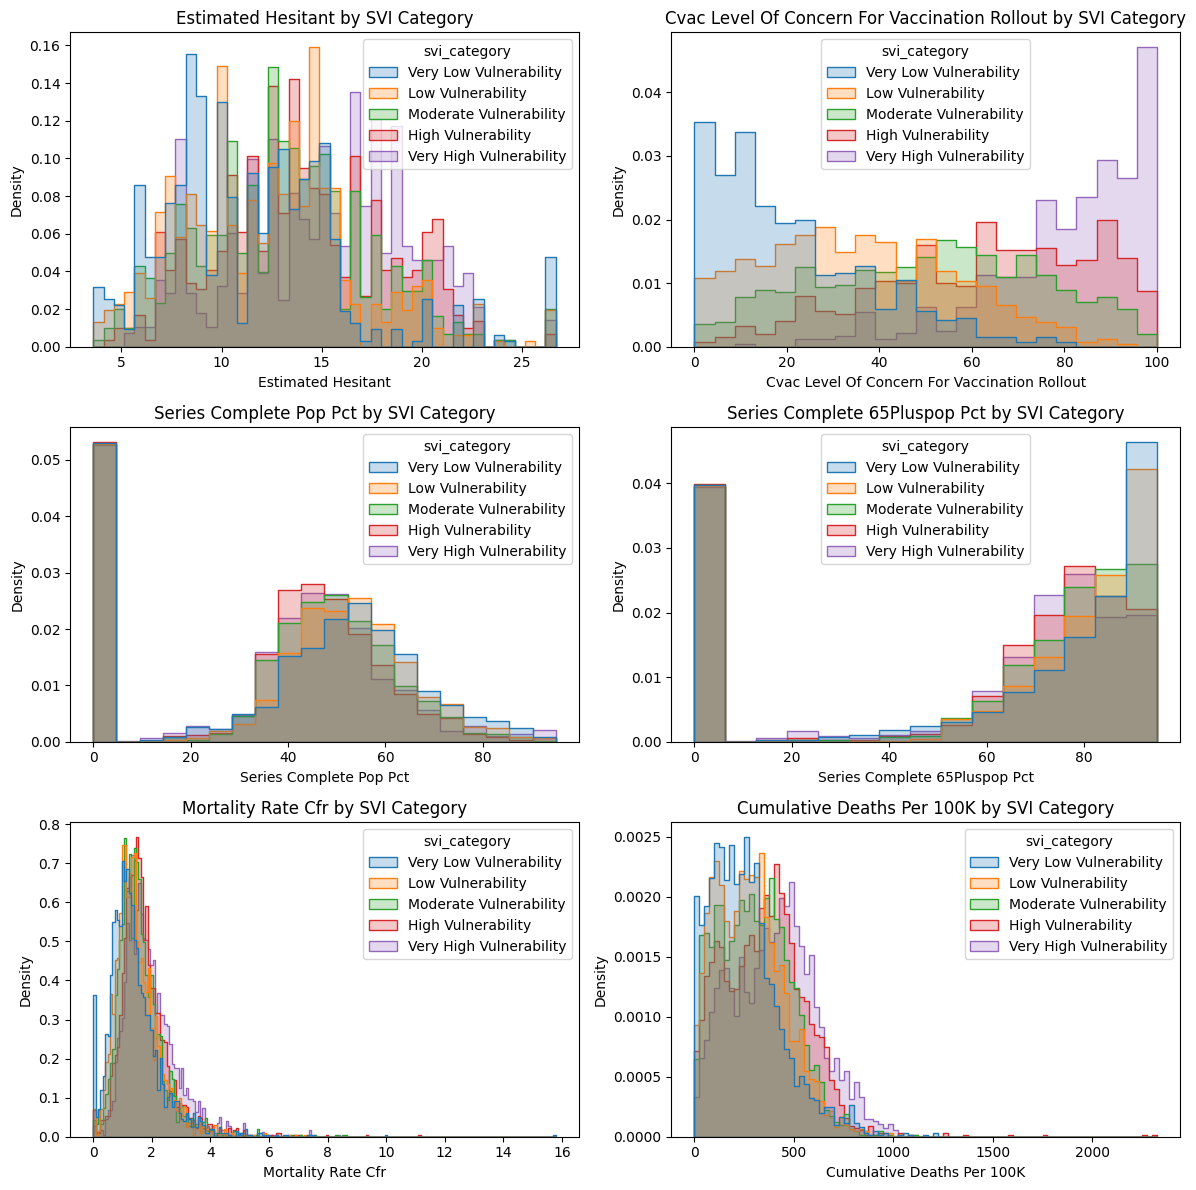

In [57]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Outcomes to plot
outcomes = [
    "estimated_hesitant",
    "cvac_level_of_concern_for_vaccination_rollout",
    "series_complete_pop_pct",
    "series_complete_65pluspop_pct",
    "mortality_rate_cfr",
    "cumulative_deaths_per_100k"
]

# Create figure grid
fig, axes = plt.subplots(3, 2, figsize=(12, 12))
axes = axes.flatten()

for i, outcome in enumerate(outcomes):
    ax = axes[i]
    sns.histplot(
        data=merged_df,
        x=outcome,
        hue="svi_category",
        element="step",
        stat="density",
        common_norm=False,
        ax=ax
    )
    ax.set_title(f"{outcome.replace('_', ' ').title()} by SVI Category")
    ax.set_xlabel(outcome.replace("_", " ").title())
    ax.set_ylabel("Density")
    #ax.legend(title="SVI Category", fontsize=8, title_fontsize=9)

plt.tight_layout()
save_path = "/content/drive/MyDrive/STATS-4241/histogram_grid_by_SVI.png"
plt.savefig(save_path, dpi=300, bbox_inches='tight')
plt.show()

#import os
#print(os.getcwd())




Political Alignment and SVI?

/tmp/ipython-input-58-2252300888.py:48: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  legend = ax.legend(title="County Score")


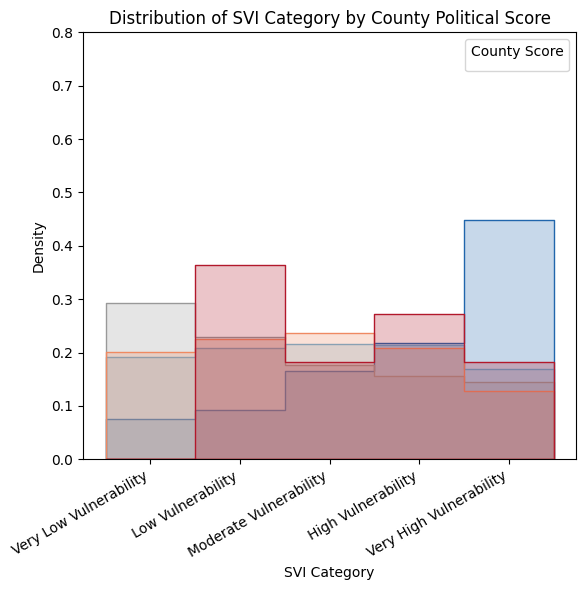

In [58]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Ensure county_score is numeric
merged_df["county_score"] = pd.to_numeric(merged_df["county_score"], errors="coerce")

# Create bins for county_score
merged_df["county_score_bin"] = pd.cut(
    merged_df["county_score"],
    bins=[-1.0, -0.4, -0.1, 0.1, 0.4, 1.0],
    labels=["Strong R", "Lean R", "Moderate", "Lean D", "Strong D"]
)

# Set bin color palette
bin_palette = {
    "Strong R": "#B2182B",
    "Lean R": "#EF8A62",
    "Moderate": "#999999",
    "Lean D": "#67A9CF",
    "Strong D": "#2166AC"
}

# Outcome to plot
outcomes = ["svi_category"]

for outcome in outcomes:
    fig, ax = plt.subplots(figsize=(6, 6))

    sns.histplot(
        data=merged_df,
        x=outcome,
        hue="county_score_bin",
        element="step",
        stat="density",
        common_norm=False,
        palette=bin_palette,
        ax=ax
    )

    ax.set_title("Distribution of SVI Category by County Political Score")
    ax.set_xlabel("SVI Category")
    ax.set_ylabel("Density")
    ax.set_ylim(0, 0.8)
    plt.xticks(rotation=30, ha='right')

    # Define and use legend
    legend = ax.legend(title="County Score")

    plt.tight_layout()
    save_path = "/content/drive/MyDrive/STATS-4241/histogram_countyscore_by_SVI.png"
    plt.savefig(save_path, dpi=300, bbox_inches='tight', bbox_extra_artists=[legend])
    plt.show()


Variables of interest by Political Alignment

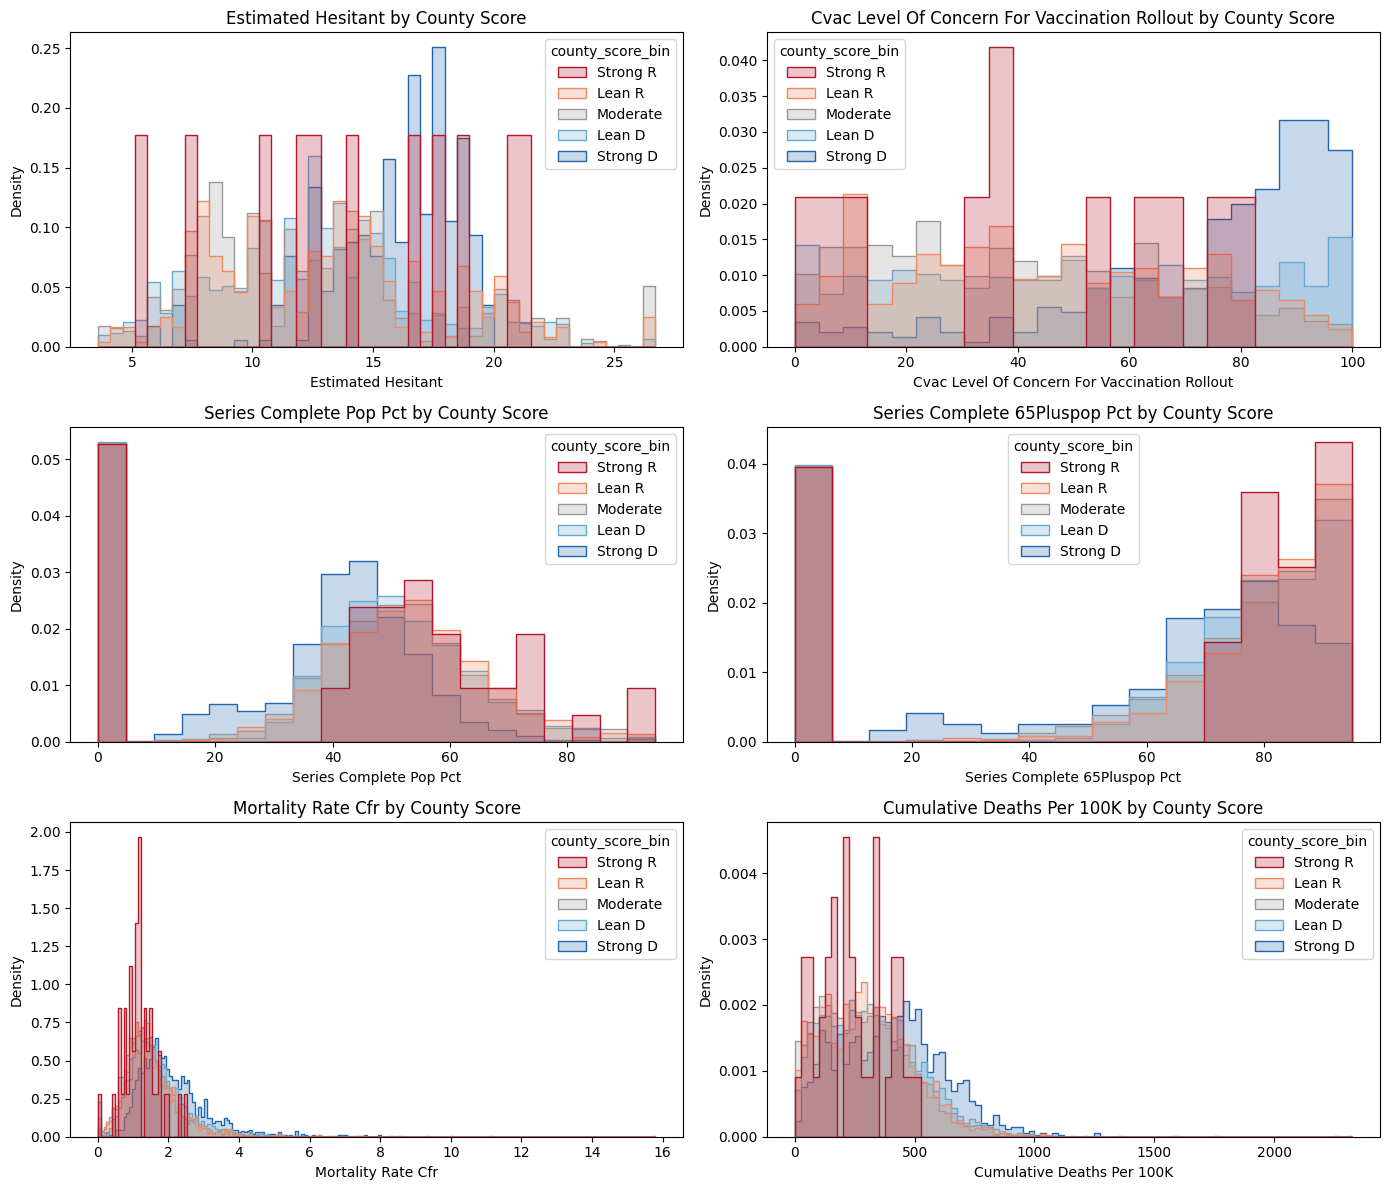

In [59]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

# Prepare the DataFrame
merged_df["county_score"] = pd.to_numeric(merged_df["county_score"], errors="coerce")

# Create bins for county_score
merged_df["county_score_bin"] = pd.cut(
    merged_df["county_score"],
    bins=[-1.0, -0.4, -0.1, 0.1, 0.4, 1.0],
    labels=["Strong R", "Lean R", "Moderate", "Lean D", "Strong D"]
)

# Set bin color palette
bin_palette = {
    "Strong R": "#B2182B",
    "Lean R": "#EF8A62",
    "Moderate": "#999999",
    "Lean D": "#67A9CF",
    "Strong D": "#2166AC"
}

# Define outcomes for grid plotting (excluding svi_category)
outcomes = [
    "estimated_hesitant",
    "cvac_level_of_concern_for_vaccination_rollout",
    "series_complete_pop_pct",
    "series_complete_65pluspop_pct",
    "mortality_rate_cfr",
    "cumulative_deaths_per_100k"
]

# Create 2x3 grid of histograms
fig, axes = plt.subplots(3, 2, figsize=(14, 12))
axes = axes.flatten()

for i, outcome in enumerate(outcomes):
    ax = axes[i]
    sns.histplot(
        data=merged_df,
        x=outcome,
        hue="county_score_bin",
        element="step",
        stat="density",
        common_norm=False,
        palette=bin_palette,
        ax=ax
    )
    ax.set_title(f"{outcome.replace('_', ' ').title()} by County Score")
    ax.set_xlabel(outcome.replace("_", " ").title())
    ax.set_ylabel("Density")
    handles, labels = ax.get_legend_handles_labels()
   # if i == 0 and handles:
    #    ax.legend(handles=handles, labels=labels, title="County Score")
    #else:
     #   ax.get_legend().remove()

plt.tight_layout()
save_path = "/content/drive/MyDrive/STATS-4241/histogram_grid_by_county_score.png"
plt.savefig(save_path, dpi=300, bbox_inches='tight')
plt.show()




### Correlations

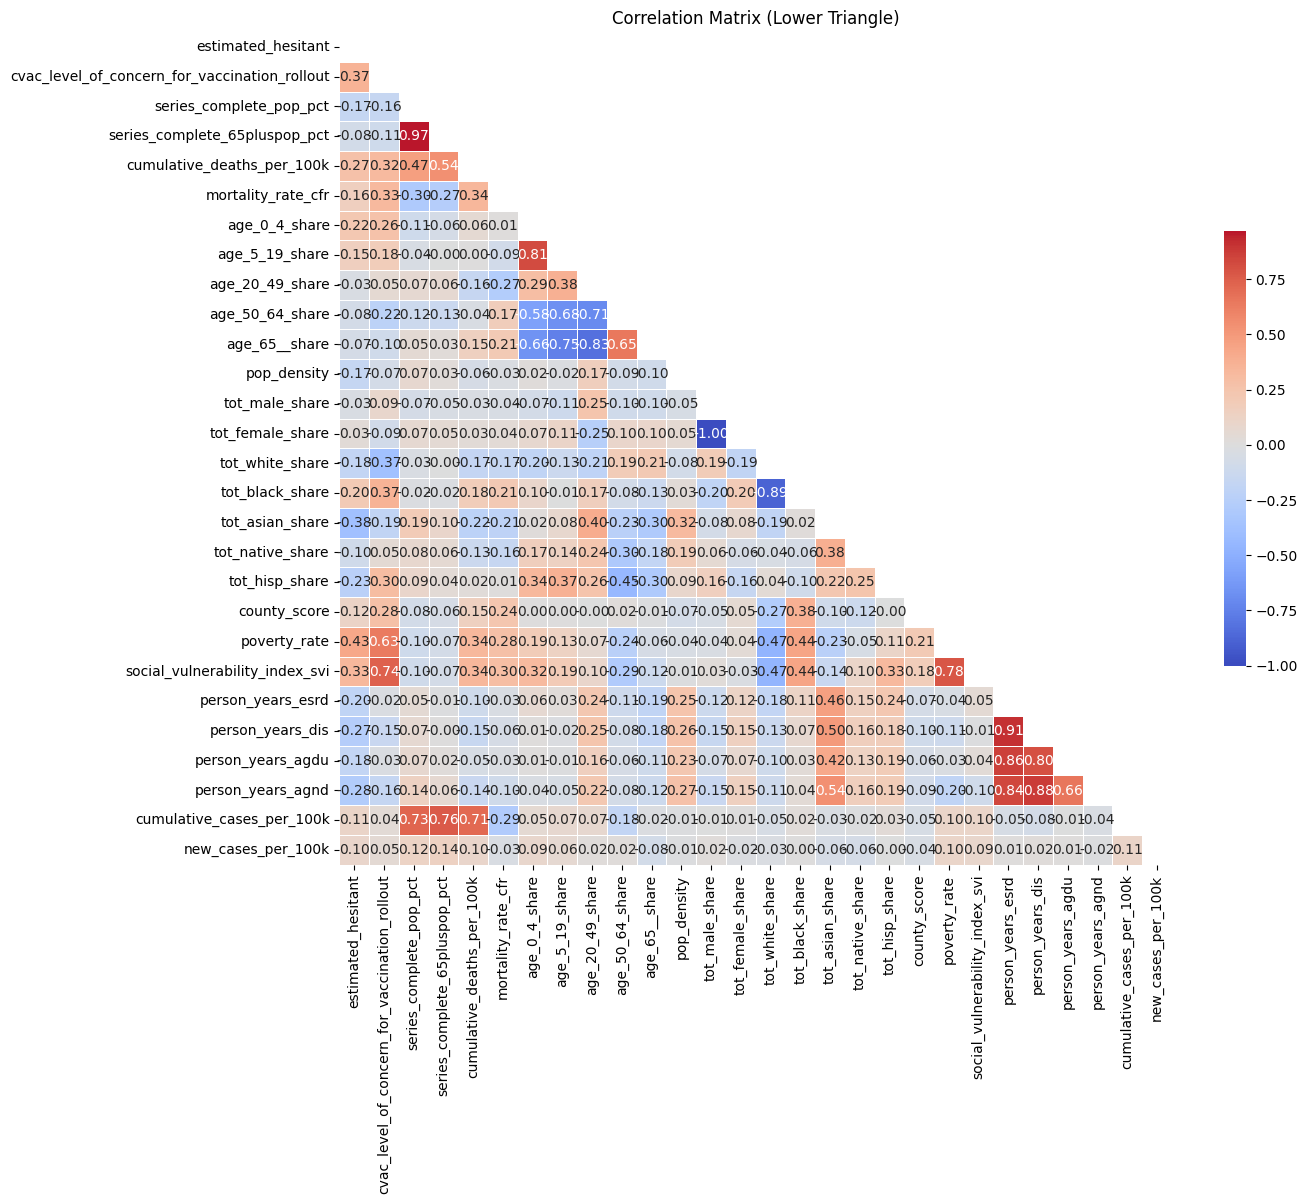

In [60]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

# Assume merged_df is already loaded in the environment
selected_vars = [
    "estimated_hesitant",
    "cvac_level_of_concern_for_vaccination_rollout",
    "series_complete_pop_pct",
    "series_complete_65pluspop_pct",
    "cumulative_deaths_per_100k",
    "mortality_rate_cfr",
    "age_0_4_share", "age_5_19_share", "age_20_49_share",
    "age_50_64_share", "age_65__share",
    "pop_density",
    "tot_male_share", "tot_female_share",
    "tot_white_share", "tot_black_share",
    "tot_asian_share", "tot_native_share", "tot_hisp_share",
    "county_score",
    "poverty_rate", "social_vulnerability_index_svi",
    "person_years_esrd", "person_years_dis",
    "person_years_agdu", "person_years_agnd",
    "cumulative_cases_per_100k",
    "new_cases_per_100k"
]

# Subset the dataframe
df_corr = merged_df[selected_vars].copy()

# Convert all to numeric and drop rows with missing values
df_corr = df_corr.apply(pd.to_numeric, errors='coerce').dropna()

# Compute the correlation matrix
corr_matrix = df_corr.corr()

# Generate a mask for the upper triangle
mask = np.triu(np.ones_like(corr_matrix, dtype=bool))

# Set up the matplotlib figure
plt.figure(figsize=(14, 12))

# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(corr_matrix, mask=mask, cmap='coolwarm', center=0,
            square=True, linewidths=.5, annot=True, fmt=".2f", cbar_kws={"shrink": .5})
plt.title("Correlation Matrix (Lower Triangle)")
plt.tight_layout()
save_path = "/content/drive/MyDrive/STATS-4241/correlation_matrix.png"
plt.savefig(save_path, dpi=300, bbox_inches='tight')
plt.show()


## Unsupervised approach

### Finding clusters

Using various unsupervised approaches to find signals in the data.

/usr/local/lib/python3.11/dist-packages/sklearn/impute/_base.py:635: UserWarning: Skipping features without any observed values: ['state' 'county' 'date' 'recip_county' 'recip_state' 'svi_ctgy'
 'metro_status' 'svi_category' 'cvac_level_of_concern' 'county_score_bin']. At least one non-missing value is needed for imputation with strategy='mean'.
  warnings.warn(


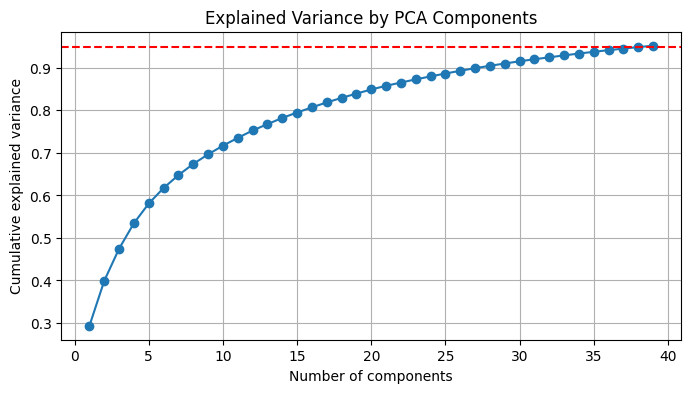

In [61]:
meta_columns = merged_df[["county_score", "estimated_hesitant", "cumulative_cases"]]
X = merged_df.apply(pd.to_numeric, errors='coerce')

imputer = SimpleImputer(strategy='mean')
X_imputed = imputer.fit_transform(X)
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X_imputed)

pca_temp = PCA(n_components=0.95, random_state=0)
X_pca_temp = pca_temp.fit_transform(X_scaled)
explained_var_ratio = pca_temp.explained_variance_ratio_
cum_var = np.cumsum(explained_var_ratio)

plt.figure(figsize=(8, 4))
plt.plot(range(1, len(cum_var) + 1), cum_var, marker='o')
plt.xlabel("Number of components")
plt.ylabel("Cumulative explained variance")
plt.title("Explained Variance by PCA Components")
plt.axhline(y=0.95, color='r', linestyle='--')
plt.grid(True)
plt.show()

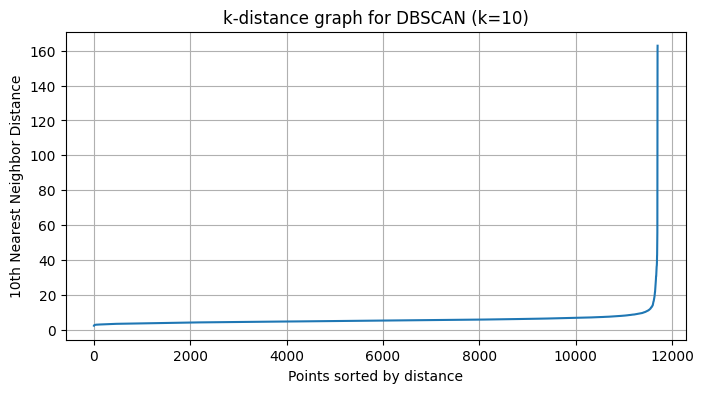

In [62]:
neighbors = NearestNeighbors(n_neighbors=10)
neighbors_fit = neighbors.fit(X_pca_temp)
distances, indices = neighbors_fit.kneighbors(X_pca_temp)
k_distances = np.sort(distances[:, 9])

plt.figure(figsize=(8, 4))
plt.plot(k_distances)
#plt.ylim(0, 50)
plt.ylabel("10th Nearest Neighbor Distance")
plt.xlabel("Points sorted by distance")
plt.title("k-distance graph for DBSCAN (k=10)")
plt.grid(True)
plt.show()


               pc1       pc2       pc3       pc4       pc5        pc6  \
cluster                                                                 
-1       32.635731  0.896646 -0.154098  0.648842 -1.107969   1.606619   
 0       -0.588013 -0.018512  0.004812 -0.010660  0.013501  -0.032905   
 1       -2.445613  2.986163 -5.919667  0.306521 -0.852509   0.819514   
 2       29.265540  6.122291  3.298828 -1.456920  0.016144  -1.123463   
 3        3.363176 -1.344055 -0.756733  0.586397  5.763996  10.036614   
 4       24.853754 -2.732282  2.919376 -0.548953  3.504365  -2.714124   

              pc7       pc8       pc9       pc10  county_score  \
cluster                                                          
-1       0.243200 -0.142869  0.036831   1.892328      0.077748   
 0       0.003417  0.002189  0.001345  -0.050380      0.123874   
 1      -5.588829 -1.217137 -0.470067   1.667471      0.186404   
 2      -0.611769  1.526395 -1.011851  -1.973279     -0.002241   
 3      -1.252918 -

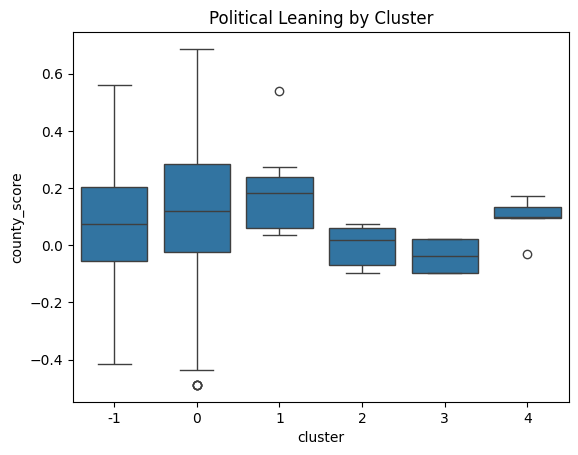

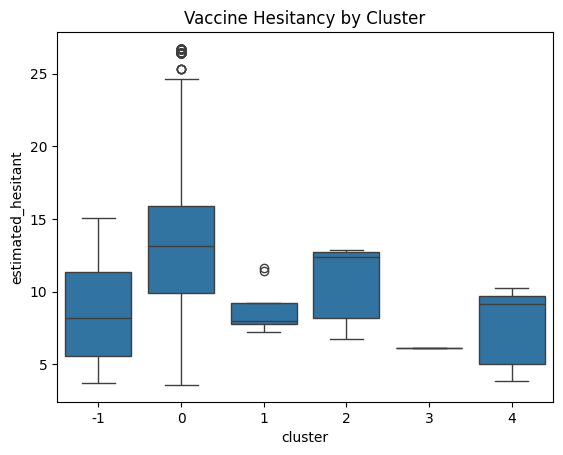

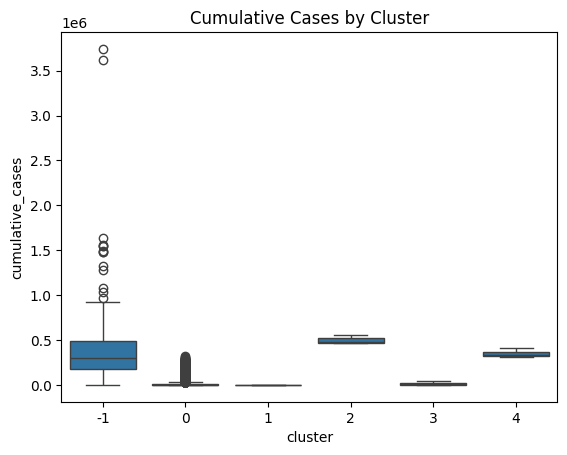

In [63]:
pca = PCA(n_components=10, random_state=0)
X_pca = pca.fit_transform(X_scaled)

tsne = TSNE(n_components=2, perplexity=30, random_state=0)
tsne_embedding = tsne.fit_transform(X_pca)

pca_df = pd.DataFrame(X_pca, columns=[f"pc{i+1}" for i in range(X_pca.shape[1])])
pca_df = pd.concat([pca_df.reset_index(drop=True), meta_columns.reset_index(drop=True)], axis=1)

dbscan = DBSCAN(eps=5, min_samples=5)
pca_df["cluster"] = dbscan.fit_predict(X_pca)

cluster_summary = pca_df.groupby("cluster").mean()
print(cluster_summary)

sns.boxplot(x="cluster", y="county_score", data=pca_df)
plt.title("Political Leaning by Cluster")
plt.show()

sns.boxplot(x="cluster", y="estimated_hesitant", data=pca_df)
plt.title("Vaccine Hesitancy by Cluster")
plt.show()

sns.boxplot(x="cluster", y="cumulative_cases", data=pca_df)
plt.title("Cumulative Cases by Cluster")
plt.show()

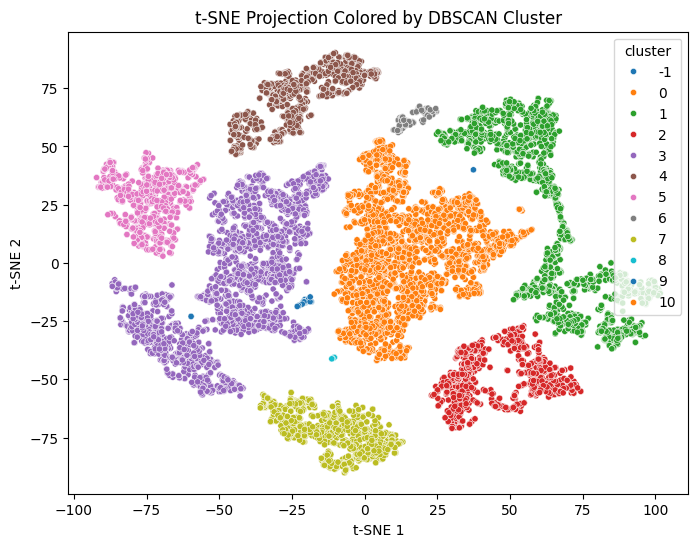

In [64]:
plt.figure(figsize=(8, 6))
dbscan = DBSCAN(eps=5, min_samples=5)
pca_df["cluster"] = dbscan.fit_predict(tsne_embedding)
sns.scatterplot(x=tsne_embedding[:, 0], y=tsne_embedding[:, 1], hue=pca_df["cluster"], palette="tab10", s=20)
plt.title("t-SNE Projection Colored by DBSCAN Cluster")
plt.xlabel("t-SNE 1")
plt.ylabel("t-SNE 2")
plt.legend(title="cluster")
plt.show()


Average silhouette score: 0.073
         cluster_size  avg_silhouette
cluster                              
0                2920       -0.137663
1                2033       -0.295600
2                1038        0.594731
3                2752       -0.123266
4                 949        0.429073
5                 878        0.668930
6                 121        0.854776
7                 956        0.445121
8                  10        0.983172
9                  28        0.920218
10                 16        0.984625


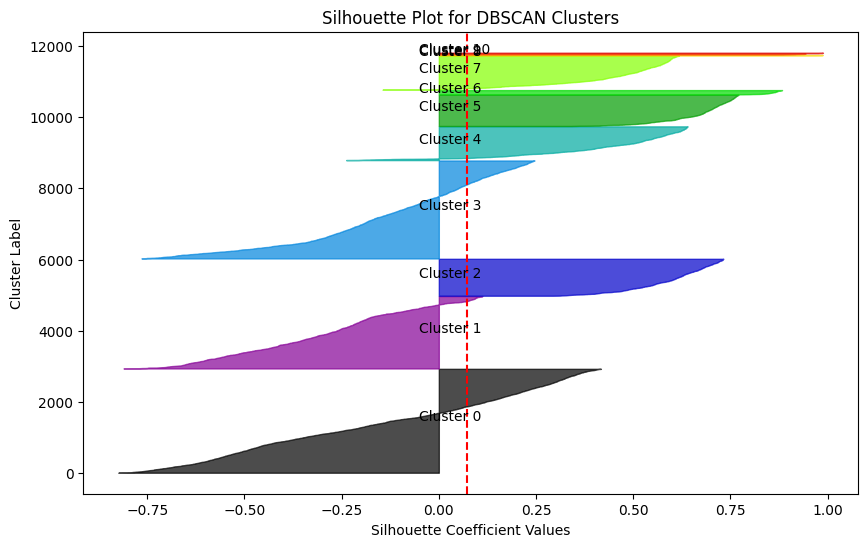

In [71]:
from collections import Counter

labels = pca_df["cluster"].values
mask = labels != -1
filtered_embedding = tsne_embedding[mask]
filtered_labels = labels[mask]

avg_silhouette = silhouette_score(filtered_embedding, filtered_labels)
sample_silhouette = silhouette_samples(filtered_embedding, filtered_labels)

print(f"Average silhouette score: {avg_silhouette:.3f}")

pca_df.loc[mask, "silhouette_score"] = sample_silhouette

cluster_info = (
    pca_df[mask]
    .groupby("cluster")
    .agg(cluster_size=("cluster", "size"), avg_silhouette=("silhouette_score", "mean"))
    .sort_index()
)

print(cluster_info)

n_clusters = len(cluster_info)
y_lower = 10
plt.figure(figsize=(10, 6))

for i in cluster_info.index:
    ith_cluster_silhouette = sample_silhouette[filtered_labels == i]
    ith_cluster_silhouette.sort()
    size = ith_cluster_silhouette.shape[0]
    y_upper = y_lower + size
    color = cm.nipy_spectral(float(i) / n_clusters)
    plt.fill_betweenx(np.arange(y_lower, y_upper), 0, ith_cluster_silhouette, facecolor=color, edgecolor=color, alpha=0.7)
    plt.text(-0.05, y_lower + 0.5 * size, f"Cluster {i}")
    y_lower = y_upper + 10

plt.title("Silhouette Plot for DBSCAN Clusters")
plt.xlabel("Silhouette Coefficient Values")
plt.ylabel("Cluster Label")
plt.axvline(x=avg_silhouette, color="red", linestyle="--")
plt.show()


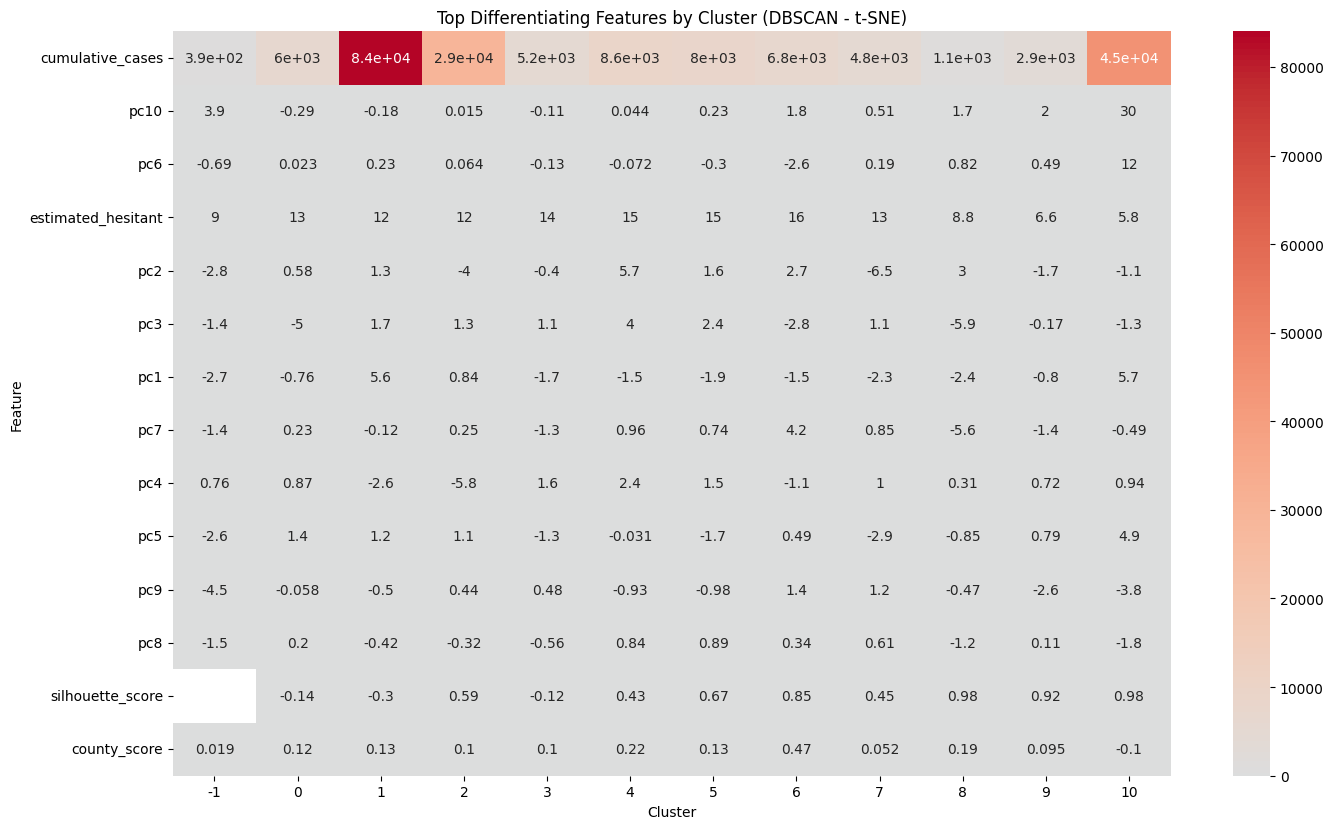

In [66]:
cluster_features = pca_df.groupby("cluster").mean()
feature_comparison = cluster_features.T
feature_comparison["std_across_clusters"] = feature_comparison.std(axis=1)
feature_comparison_sorted = feature_comparison.sort_values(by="std_across_clusters", ascending=False)
top_n = 15
top_features = feature_comparison_sorted.head(top_n).drop(columns=["std_across_clusters"])
top_features = top_features.astype(float)

num_features, num_clusters = top_features.shape
plt.figure(figsize=(1.2 * num_clusters, 0.6 * num_features))
sns.heatmap(top_features, annot=True, cmap="coolwarm", center=0)
plt.title("Top Differentiating Features by Cluster (DBSCAN - t-SNE)")
plt.ylabel("Feature")
plt.xlabel("Cluster")
plt.tight_layout()
plt.show()


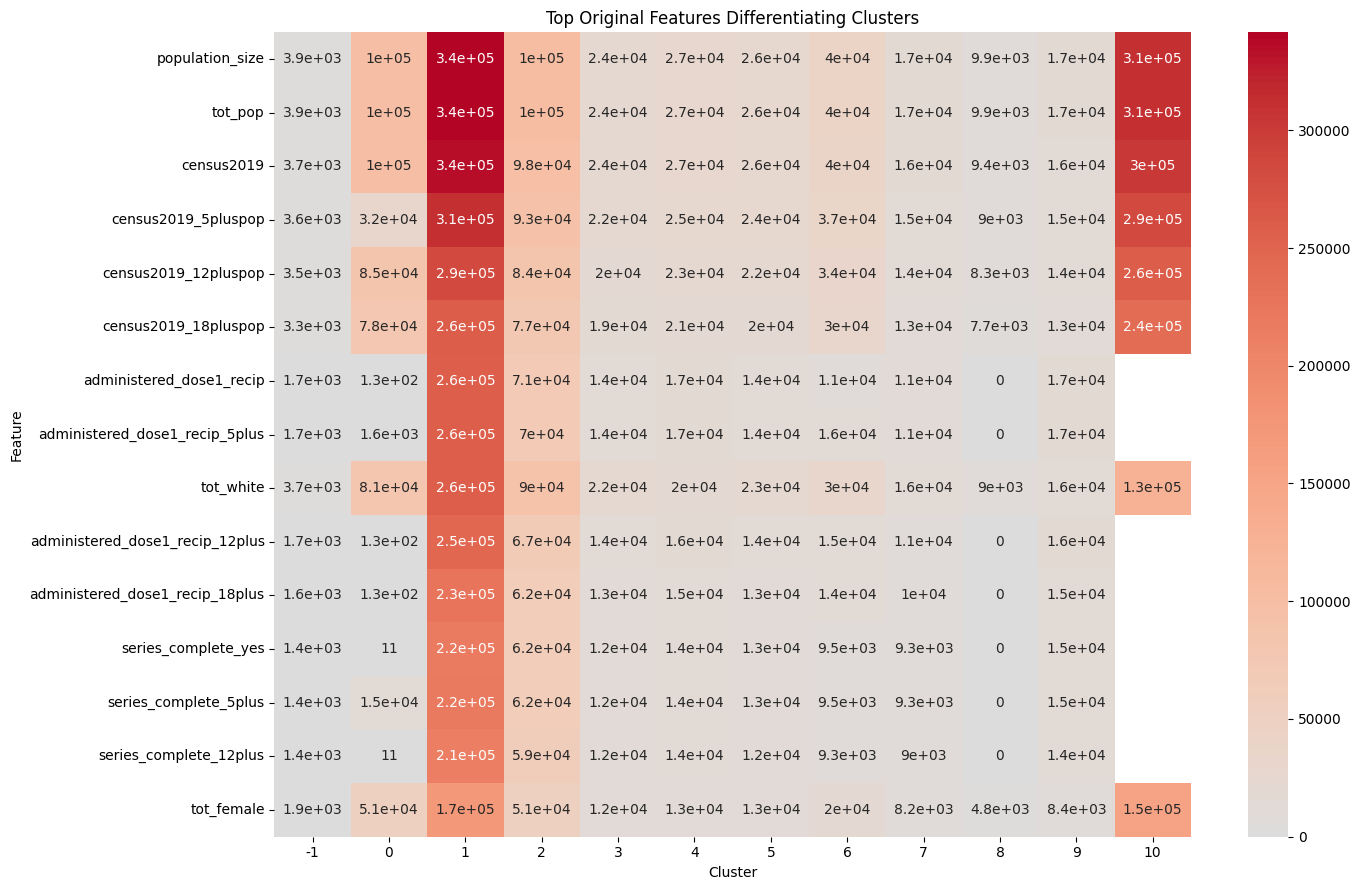

In [67]:
original_features_df = X.copy()
original_features_df["cluster"] = pca_df["cluster"].values

cluster_feature_means = original_features_df.groupby("cluster").mean().T
cluster_feature_means["std_across_clusters"] = cluster_feature_means.std(axis=1)
cluster_feature_means_sorted = cluster_feature_means.sort_values(by="std_across_clusters", ascending=False)

top_n = 15
top_features_by_cluster = cluster_feature_means_sorted.head(top_n).drop(columns=["std_across_clusters"])

num_features, num_clusters = top_features_by_cluster.shape
plt.figure(figsize=(1.2 * num_clusters, 0.6 * num_features))
sns.heatmap(top_features_by_cluster, annot=True, cmap="coolwarm", center=0)
plt.title("Top Original Features Differentiating Clusters")
plt.ylabel("Feature")
plt.xlabel("Cluster")
plt.tight_layout()
plt.show()


### Exploratory statisitcs

In [68]:
merged_df = merged_df.apply(pd.to_numeric, errors='coerce')

vaccine_cols = [col for col in merged_df.columns if "dose" in col or "series_complete" in col]
vaccine_cols += ["cumulative_cases", "cumulative_deaths"]

population_cols = [col for col in merged_df.columns if "pop" in col.lower()]
area_cols = [col for col in merged_df.columns if "area" in col.lower()]

pop_col = next((col for col in population_cols if "pct" not in col.lower()), None)
area_col = next((col for col in area_cols if "area" in col.lower()), None)

if pop_col and area_col:
    merged_df["population_density"] = merged_df[pop_col] / merged_df[area_col]

    for col in ["cumulative_cases", "cumulative_deaths"] + vaccine_cols:
        if col in merged_df.columns:
            merged_df[f"{col}_per_100k"] = (merged_df[col] / merged_df[pop_col]) * 100000

normalized_cols = [col for col in merged_df.columns if col.endswith("_per_100k")]

analysis_df = merged_df[normalized_cols].dropna()
correlations = analysis_df.corr()["cumulative_cases_per_100k"].drop("cumulative_cases_per_100k").sort_values()

print(correlations)


booster_doses_65plus_per_100k                      -0.056159
booster_doses_50plus_per_100k                      -0.025321
booster_doses_18plus_per_100k                      -0.012017
booster_doses_per_100k                             -0.011773
booster_doses_5plus_per_100k                       -0.011731
booster_doses_12plus_per_100k                      -0.011384
series_complete_65plus_per_100k                    -0.005678
administered_dose1_recip_65plus_per_100k            0.008746
series_complete_5to17_per_100k                      0.049893
series_complete_yes_per_100k                        0.080713
series_complete_5plus_per_100k                      0.081937
series_complete_18plus_per_100k                     0.083660
series_complete_12plus_per_100k                     0.087035
administered_dose1_recip_per_100k                   0.087446
administered_dose1_recip_5plus_per_100k             0.088678
administered_dose1_recip_18plus_per_100k            0.099758
administered_dose1_recip

#### OLS total

In [69]:
df = merged_df.copy()
df = df.apply(pd.to_numeric, errors='coerce')

df["population_density"] = df["population_size"] / df["area"]
df["vaccine_rate"] = df["series_complete_5plus_per_100k"]

X = df[["vaccine_rate", "population_density"]].dropna()
y = df.loc[X.index, "cumulative_cases_per_100k"]

X = sm.add_constant(X)
model = sm.OLS(y, X).fit()
print(model.summary())

                                OLS Regression Results                               
Dep. Variable:     cumulative_cases_per_100k   R-squared:                       0.022
Model:                                   OLS   Adj. R-squared:                  0.022
Method:                        Least Squares   F-statistic:                     98.11
Date:                       Thu, 03 Jul 2025   Prob (F-statistic):           7.35e-43
Time:                               01:56:27   Log-Likelihood:                -96383.
No. Observations:                       8697   AIC:                         1.928e+05
Df Residuals:                           8694   BIC:                         1.928e+05
Df Model:                                  2                                         
Covariance Type:                   nonrobust                                         
                         coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------

## Supervised Learning

In [70]:
# # Read Data
# merged_df <- vroom::vroom("/content/drive/MyDrive/STATS-4241/merged_df.csv")